In [1]:
import os
import timeit
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category = DeprecationWarning)
warnings.filterwarnings(action='ignore', category = ConvergenceWarning)


%matplotlib inline
import numpy as np
import pandas as pd

# This ensures that all columns and rows are displayed in the dataframes
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from matplotlib import pyplot as plt
import seaborn as sns
import missingno as msno 

# Setting a random state for reproducibility 
random_state = 42

sns.set_style("darkgrid")

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge , RidgeCV , LassoCV, Lasso, ElasticNet, ElasticNetCV
from sklearn.svm import SVR
import lightgbm as lgb
from lightgbm import LGBMRegressor
from mlxtend.regressor import StackingCVRegressor, StackingRegressor

from sklearn.model_selection import GridSearchCV , RandomizedSearchCV , train_test_split , PredefinedSplit
from sklearn.model_selection import KFold, cross_val_score 
from sklearn.metrics import mean_squared_error , make_scorer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import RobustScaler

In [3]:
train = pd.read_csv('train.csv' , index_col = 0)
test = pd.read_csv('test.csv' , index_col = 0)

In [4]:
display(train.shape , test.shape)

(1460, 80)

(1459, 79)

In [5]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [7]:
train_numeric_vars = train.select_dtypes(include = ['float64' , 'int64']) 

In [8]:
train_numeric_vars.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [9]:
train_cat_vars = train.select_dtypes(exclude = ['float64' , 'int64'])

In [10]:
# Making sure that train DF is partitioned properly between the above 2 DFs
assert train_numeric_vars.shape[1] + train_cat_vars.shape[1] == train.shape[1]

In [11]:
train_numeric_vars.describe().round(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.0,1201.00,1460.00,1460.00,1460.00,1460.00,1460.00,1452.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1379.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.0
mean,56.9,70.05,10516.83,6.10,5.58,1971.27,1984.87,103.69,443.64,46.55,567.24,1057.43,1162.63,346.99,5.84,1515.46,0.43,0.06,1.57,0.38,2.87,1.05,6.52,0.61,1978.51,1.77,472.98,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,2007.82,180921.2
std,42.3,24.28,9981.26,1.38,1.11,30.20,20.65,181.07,456.10,161.32,441.87,438.71,386.59,436.53,48.62,525.48,0.52,0.24,0.55,0.50,0.82,0.22,1.63,0.64,24.69,0.75,213.80,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,79442.5
min,20.0,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,0.00,0.00,0.00,334.00,0.00,0.00,334.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,1900.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,34900.0
25%,20.0,59.00,7553.50,5.00,5.00,1954.00,1967.00,0.00,0.00,0.00,223.00,795.75,882.00,0.00,0.00,1129.50,0.00,0.00,1.00,0.00,2.00,1.00,5.00,0.00,1961.00,1.00,334.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,2007.00,129975.0
50%,50.0,69.00,9478.50,6.00,5.00,1973.00,1994.00,0.00,383.50,0.00,477.50,991.50,1087.00,0.00,0.00,1464.00,0.00,0.00,2.00,0.00,3.00,1.00,6.00,1.00,1980.00,2.00,480.00,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,163000.0
75%,70.0,80.00,11601.50,7.00,6.00,2000.00,2004.00,166.00,712.25,0.00,808.00,1298.25,1391.25,728.00,0.00,1776.75,1.00,0.00,2.00,1.00,3.00,1.00,7.00,1.00,2002.00,2.00,576.00,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,214000.0
max,190.0,313.00,215245.00,10.00,9.00,2010.00,2010.00,1600.00,5644.00,1474.00,2336.00,6110.00,4692.00,2065.00,572.00,5642.00,3.00,2.00,3.00,2.00,8.00,3.00,14.00,3.00,2010.00,4.00,1418.00,857.00,547.00,552.00,508.00,480.00,738.00,15500.00,12.00,2010.00,755000.0


In [12]:
train_cat_vars.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


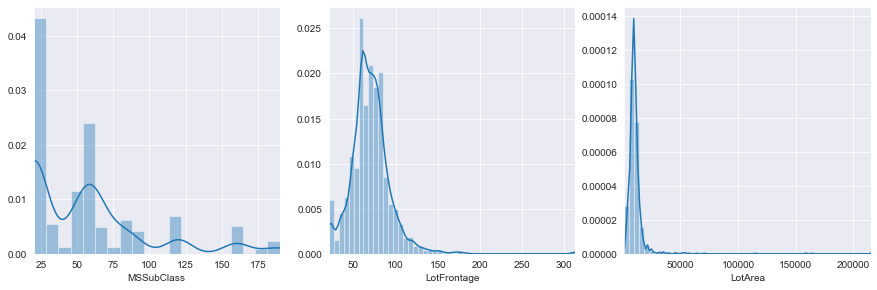

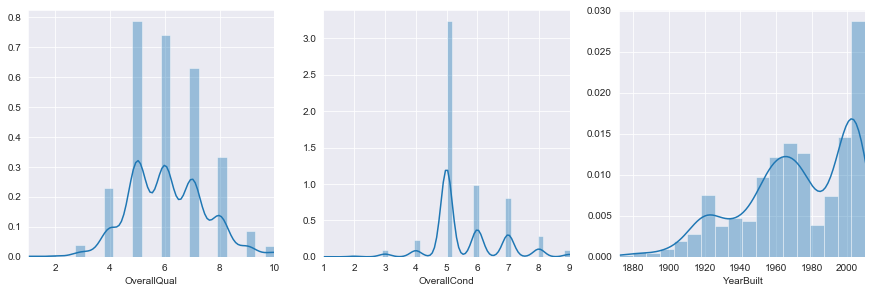

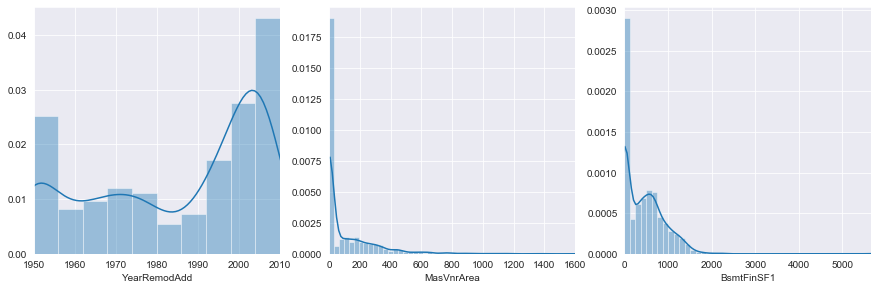

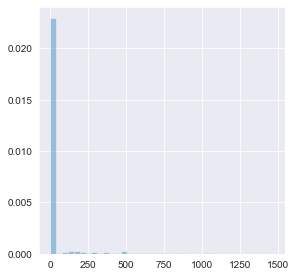

In [13]:
# Now we proceed by plotting the distribution of numeric variables (except SalePrice)
try:

    position = 1
    fig = plt.figure( figsize = (15,10) )

    for i in range(len(train_numeric_vars.columns)-1):
    
        if position <= 3:
        
            fig.add_subplot(2 , 3 , position)
        
            vals_to_plot = train_numeric_vars.iloc[:,i].dropna()
    
            sns.distplot(vals_to_plot)
        
            plt.xlabel(train_numeric_vars.columns[i])
            plt.xlim( vals_to_plot.min() , vals_to_plot.max() ) 
            ax = plt.gca()
            #ax.axes.yaxis.set_visible(False)
        
        
        position += 1
        if position == 4: 
            fig = plt.figure( figsize = (15,10) )
            position = 1
        
    fig.tight_layout( pad = 3.0)

except:
    pass

The house prices distribution has a skewness coefficient of 1.883 



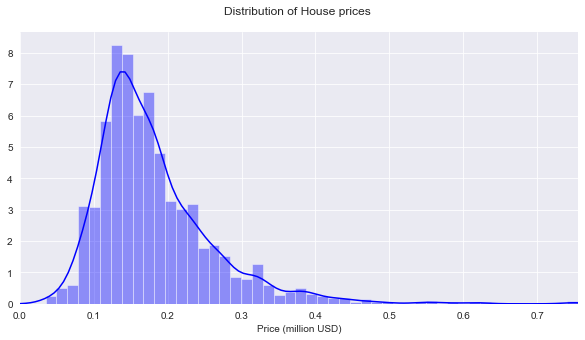

In [14]:
# We can see that house prices are positively skewed
plt.figure(figsize=(10,5))
sns.distplot(train['SalePrice'] / 10**6 , color = 'blue')
plt.title('Distribution of House prices \n')
plt.xlim(0,(train['SalePrice'] / 10**6).max()) 
plt.xlabel('Price (million USD)')
sns.despine(trim = True, left = True)

skewness = train['SalePrice'].skew().round(decimals=3)

print(f'The house prices distribution has a skewness coefficient of {skewness} \n')

The log house prices distribution has a skewness coefficient of 0.121



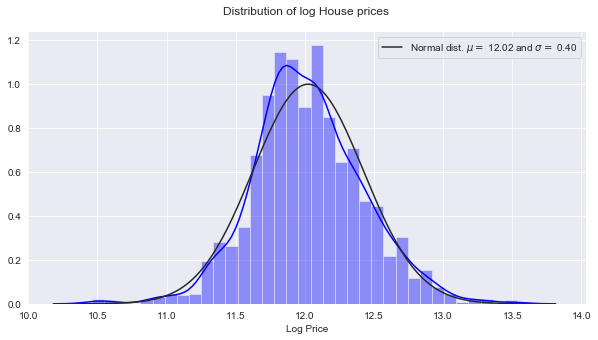

In [15]:
# Plotting log house prices we can see that they are aprox. normally distributed

log_prices = np.log( train['SalePrice'] )

from scipy.stats import norm

mu , sigma = norm.fit(log_prices)

plt.figure(figsize=(10,5))
sns.distplot(log_prices ,  color = 'blue', fit = norm)
plt.title('Distribution of log House prices \n')
plt.xlim( 10 , log_prices.max() + 0.5) 
plt.xlabel('Log Price')
plt.legend(['Normal dist. $\mu=$ {:.2f} and $\sigma=$ {:.2f} '.format(mu, sigma)]) 
sns.despine(trim = True, left = True)

log_price_skewness = log_prices.skew().round(decimals=3)

print(f'The log house prices distribution has a skewness coefficient of {log_price_skewness}\n')

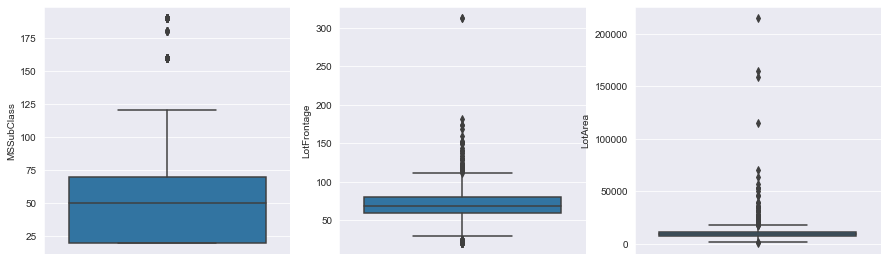

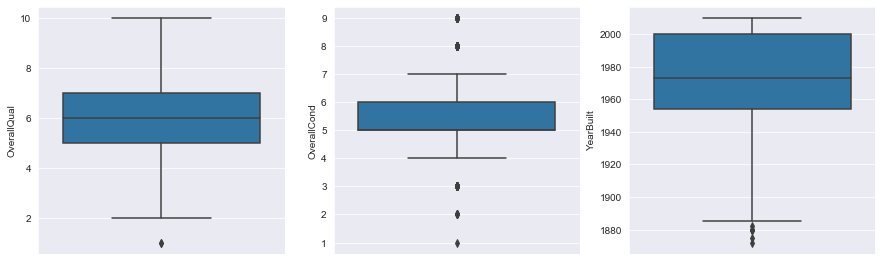

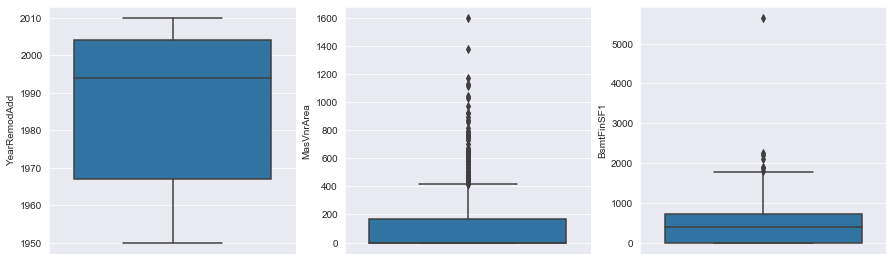

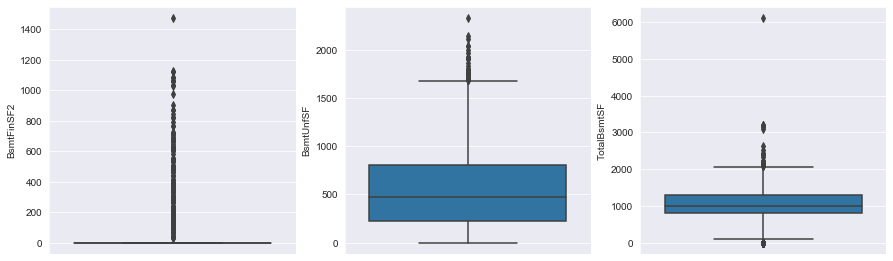

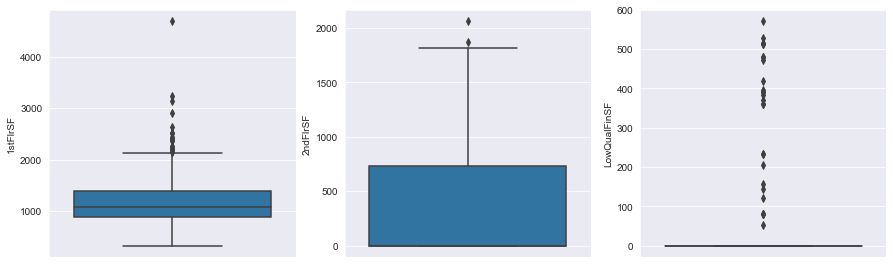

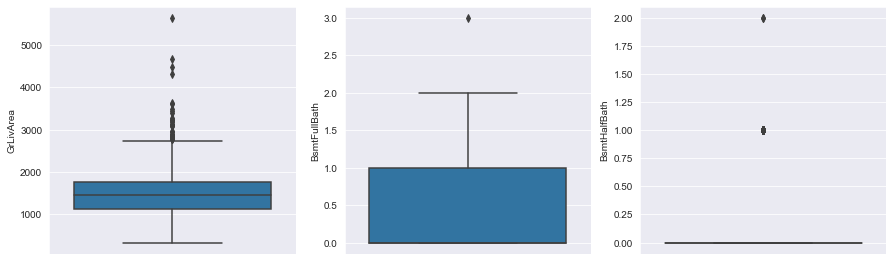

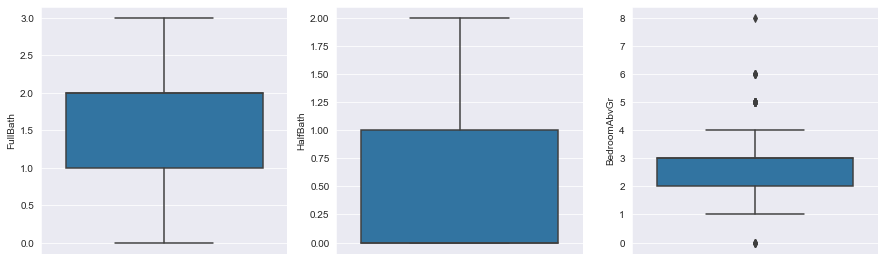

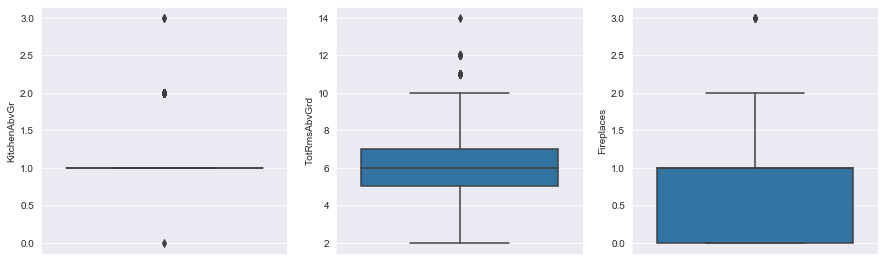

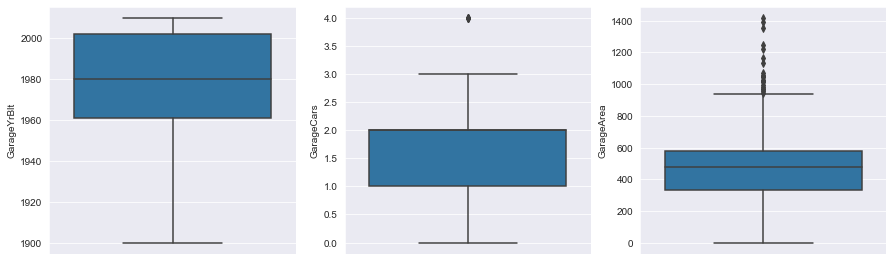

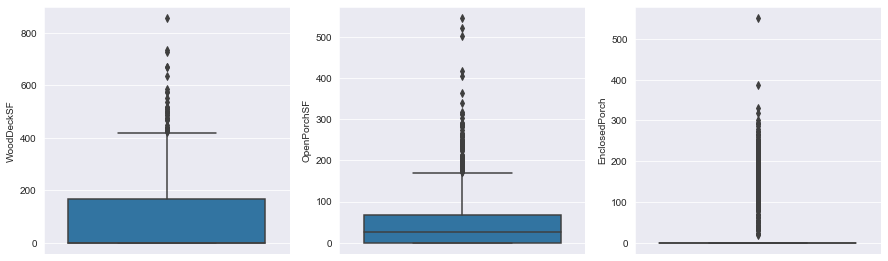

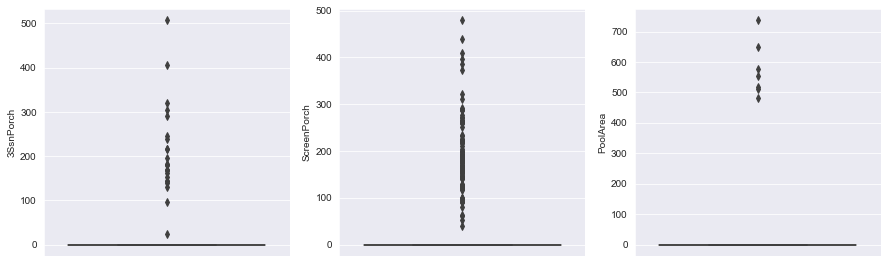

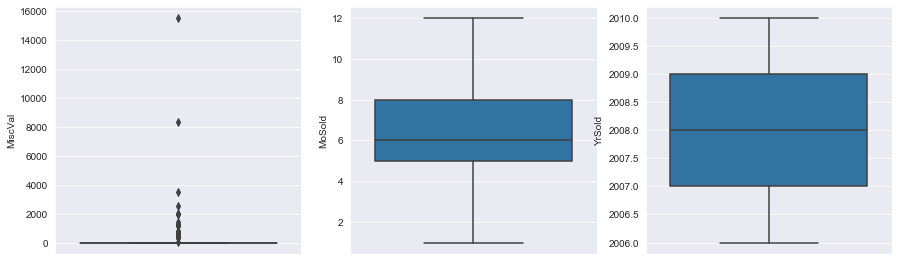

<Figure size 1080x720 with 0 Axes>

In [16]:
position = 1
fig = plt.figure( figsize = (15,10) )

for i in range(len(train_numeric_vars.columns) - 1):
    
    if position <= 3:
        
        fig.add_subplot(2 , 3 , position)
        
        vals_to_plot = train_numeric_vars.iloc[:,i].dropna()
    
        sns.boxplot(y = vals_to_plot )
        
        plt.ylabel(train_numeric_vars.columns[i])
        
        
    position += 1
    if position == 4: 
        fig = plt.figure( figsize = (15,10) )
        position = 1
        
fig.tight_layout( pad = 3.0)

In [17]:
# Showing correlation of SalePrice with the other features
price_corrs = train_numeric_vars.corr()['SalePrice'].sort_values(ascending = False)
price_corrs.head()

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64

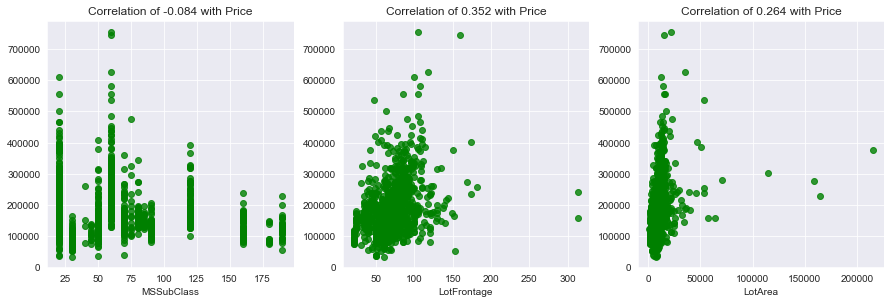

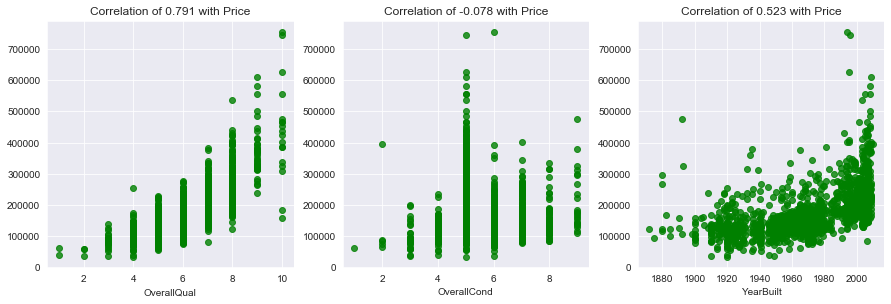

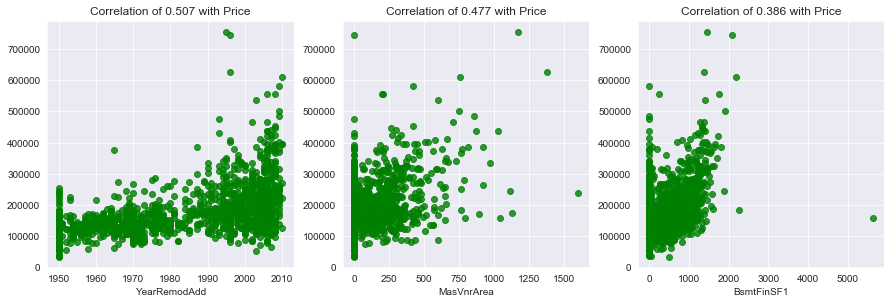

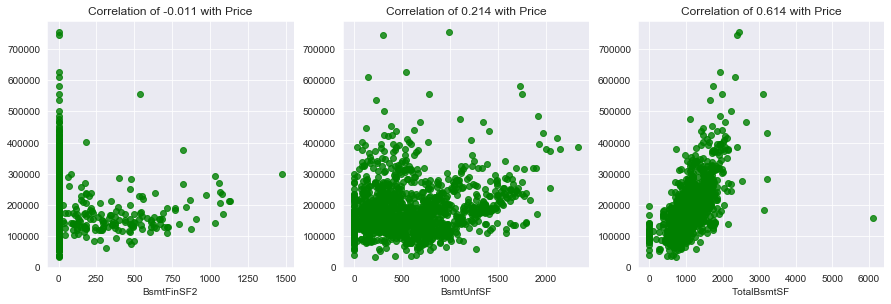

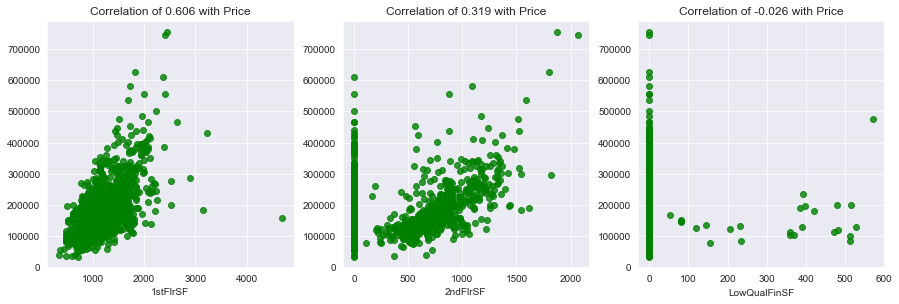

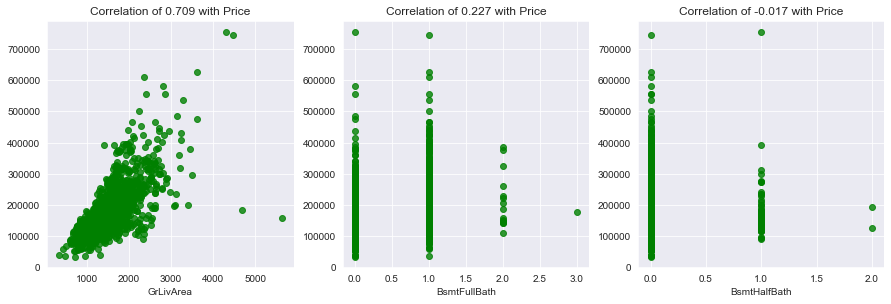

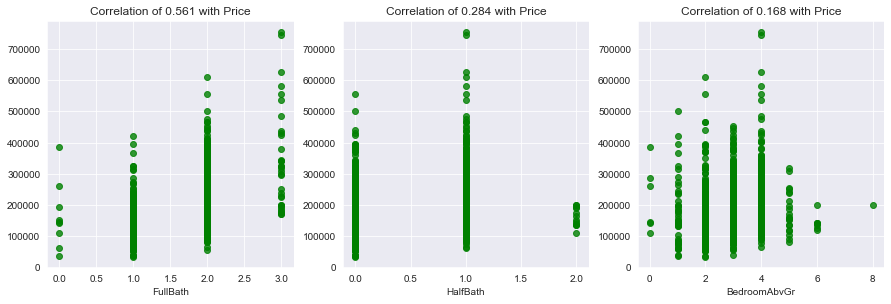

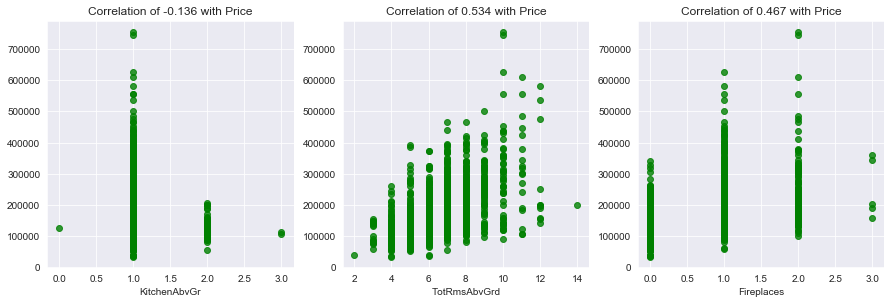

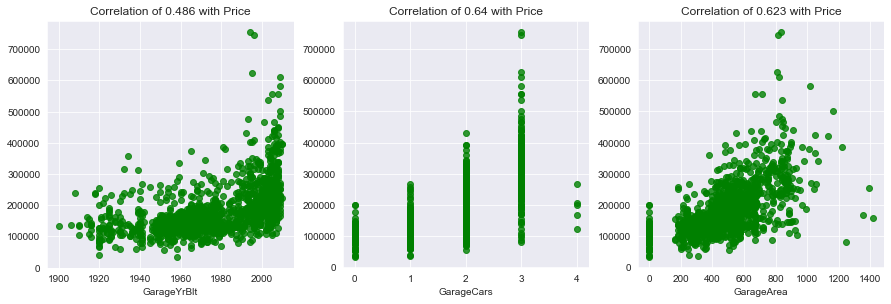

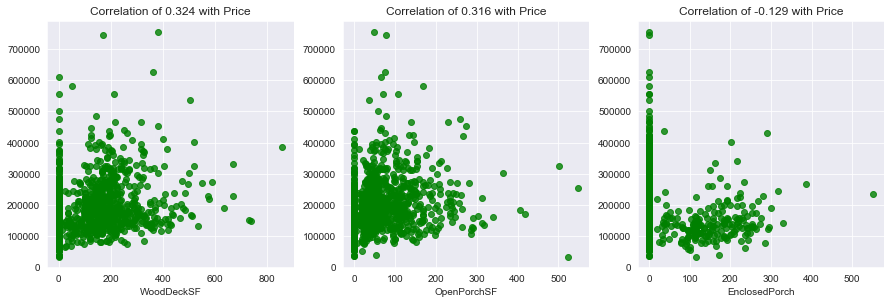

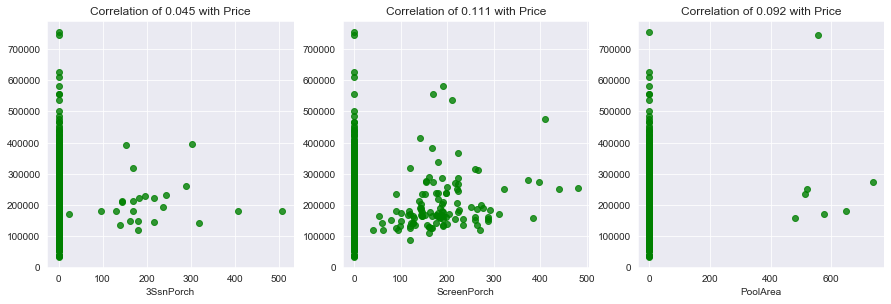

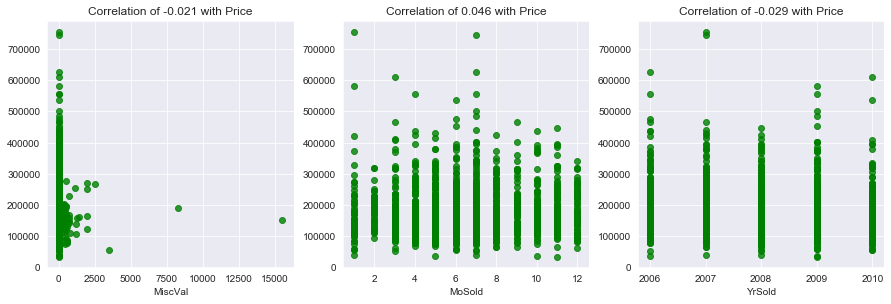

<Figure size 1080x720 with 0 Axes>

In [18]:
position = 1
fig = plt.figure( figsize = (15,10) )

for col in train_numeric_vars:
    
    if position <= 3 and col != 'SalePrice':
        
        fig.add_subplot(2 , 3 , position)
    
        plt.scatter(x = train_numeric_vars[col] , y = train_numeric_vars['SalePrice'] ,
                                                                    color='green' ,alpha=0.8 )
                                                                    
        plt.xlabel(col)
        plt.title(f'Correlation of {round(price_corrs[col],3)} with Price')
    
   
    position += 1
    if position == 4: 
        fig = plt.figure( figsize = (15,10) )
        position = 1
        
fig.tight_layout( pad = 3.0)

We will now remove any **outliers** that could potentially *skew* the distribution of numerical features

In [19]:
# Remove outliers based on the scatter plots above

train.drop(train[(train['LotFrontage']>250) & (train['SalePrice']<300000)].index, inplace=True)
train.drop(train[(train['LotArea']>150000) & (train['SalePrice']<400000)].index, inplace=True)
train.drop(train[(train['OverallQual']<5) & (train['SalePrice']>200000)].index, inplace=True)
train.drop(train[(train['OverallCond']<3) & (train['SalePrice']>300000)].index, inplace=True)
train.drop(train[(train['BsmtFinSF1']>4000) & (train['SalePrice']<200000)].index, inplace=True)
train.drop(train[(train['TotalBsmtSF']>6000) & (train['SalePrice']<200000)].index, inplace=True)
train.drop(train[(train['1stFlrSF']>4000) & (train['SalePrice']<200000)].index, inplace=True)
train.drop(train[(train['LowQualFinSF']>550) & (train['SalePrice']>400000)].index, inplace=True)
train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<200000)].index, inplace=True)
train.drop(train[(train['EnclosedPorch']>500) & (train['SalePrice']<300000)].index, inplace=True)
train.drop(train[(train['PoolArea']>400) & (train['SalePrice']>600000)].index, inplace=True)
train.drop(train[(train['OverallQual']<5) & (train['SalePrice']>200000)].index, inplace=True)
train.drop(train[(train['GrLivArea']>4500) & (train['SalePrice']<300000)].index, inplace=True)

train.reset_index(drop=True, inplace=True)

In [20]:
train.shape

(1449, 80)

### Let's move on to categorical features EDA

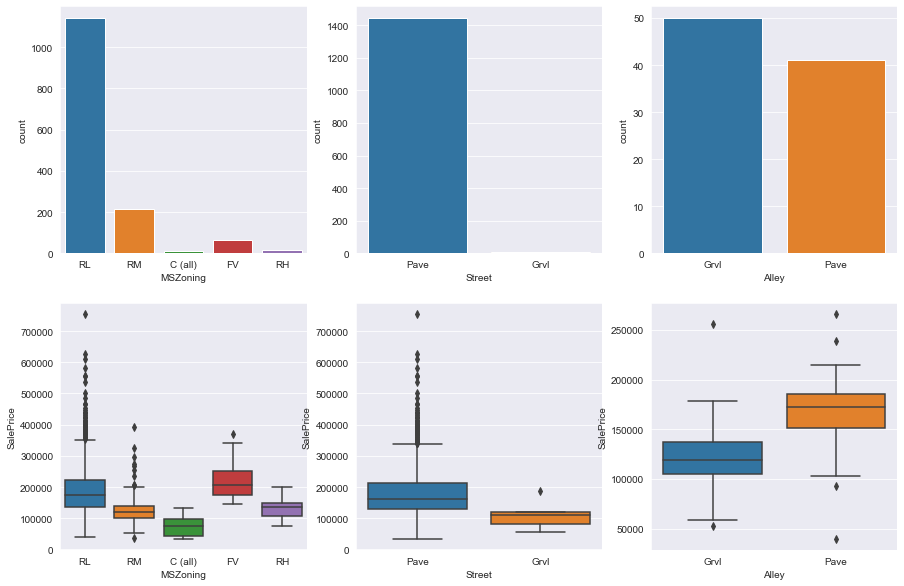

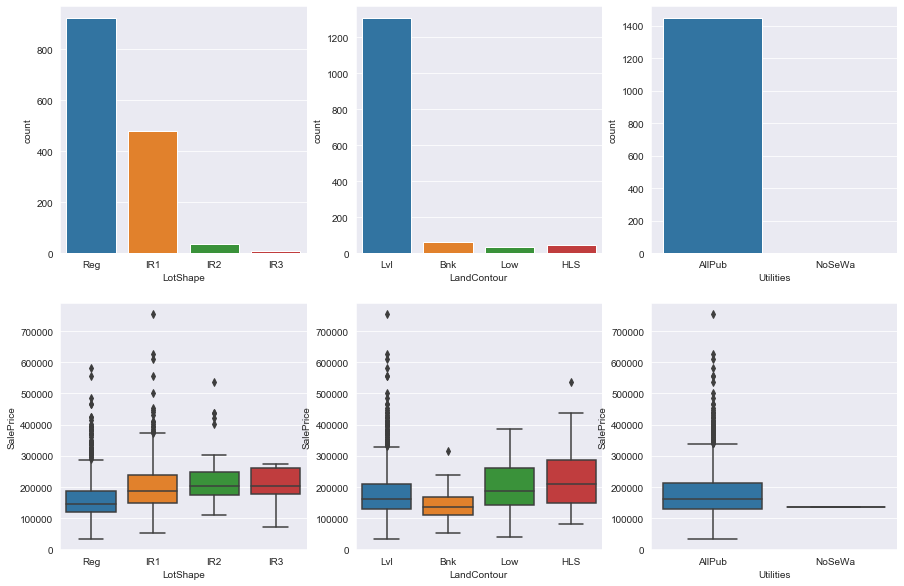

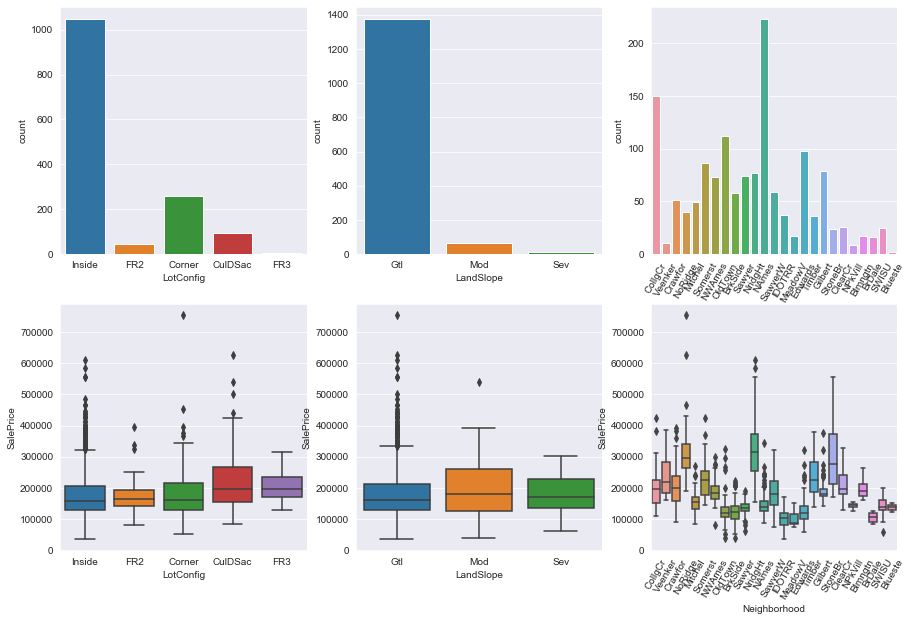

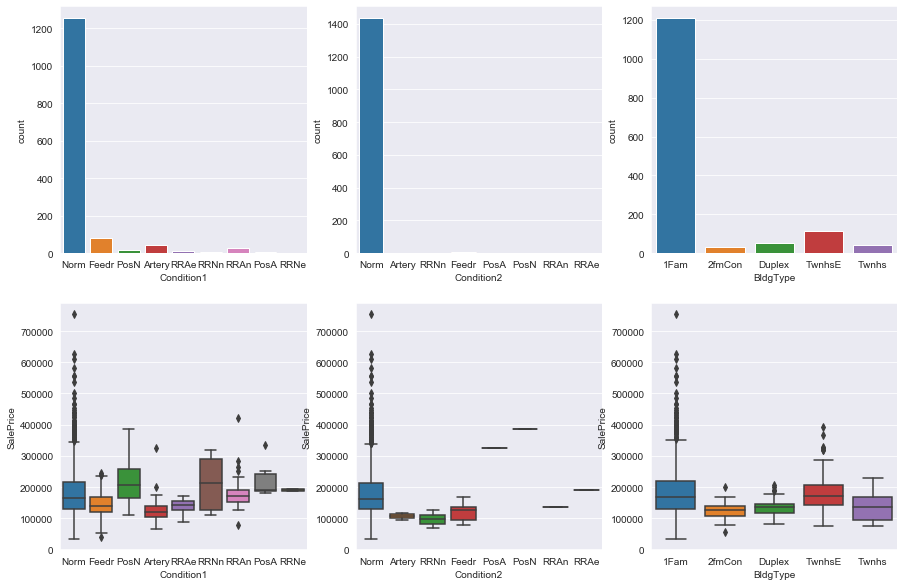

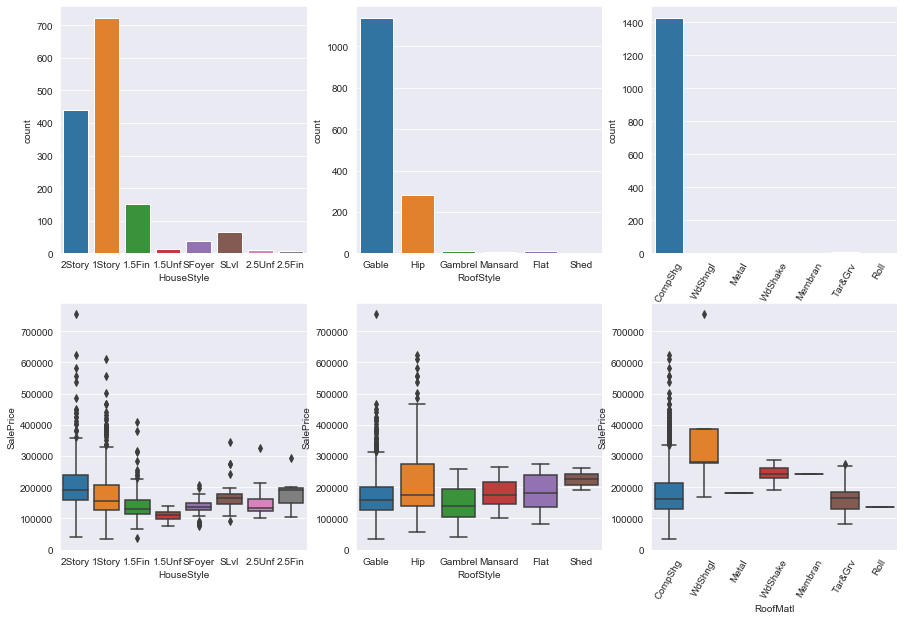

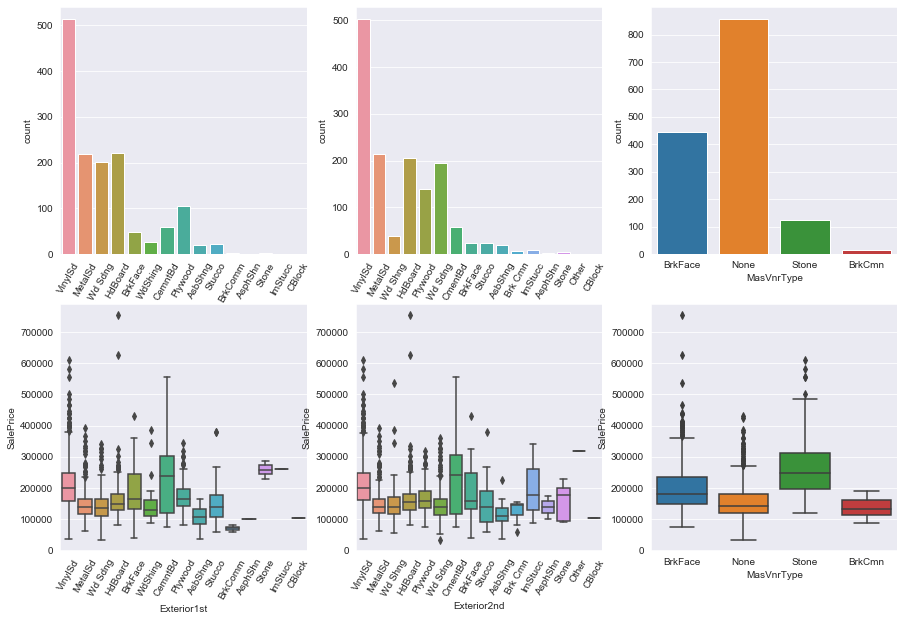

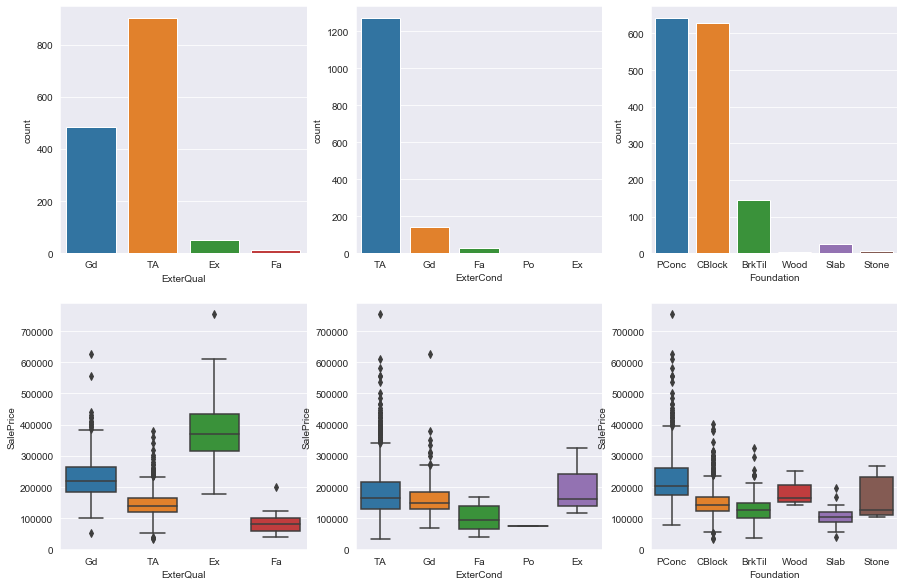

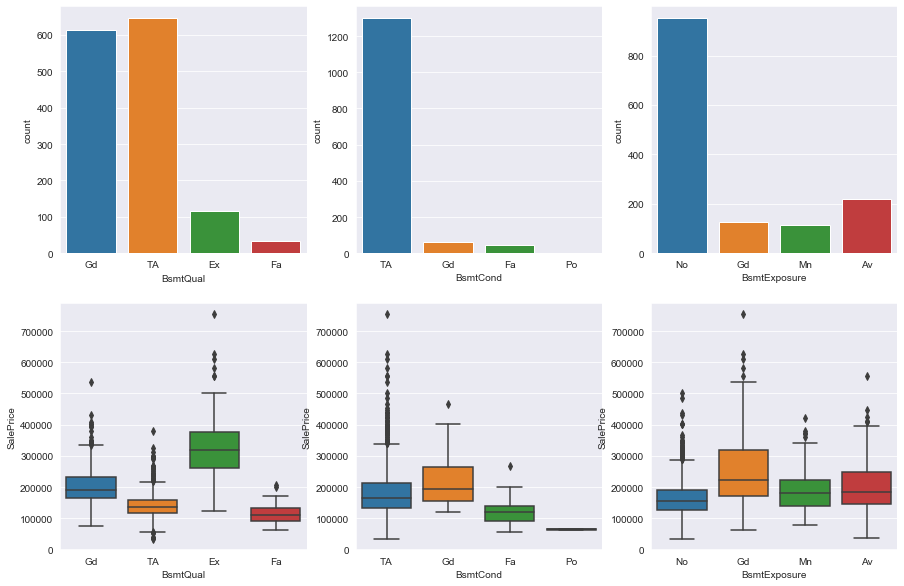

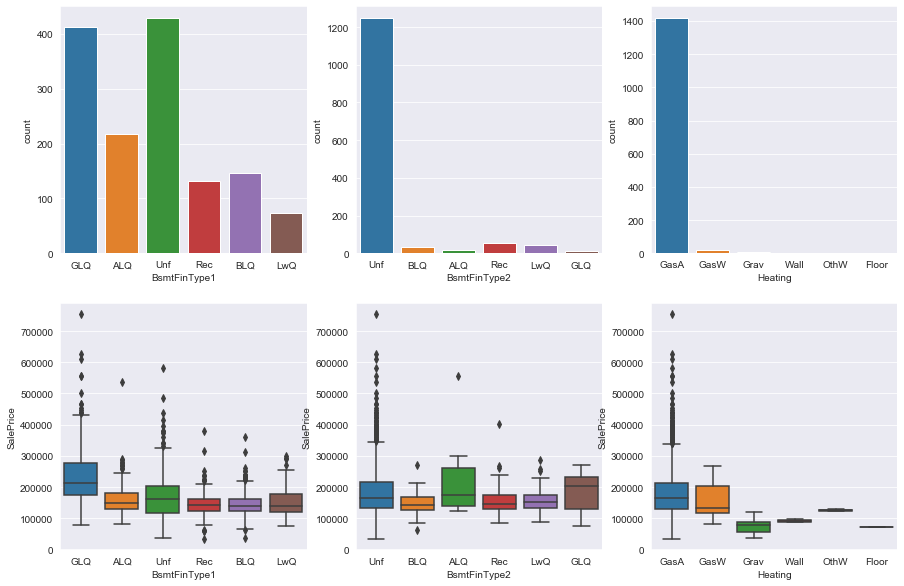

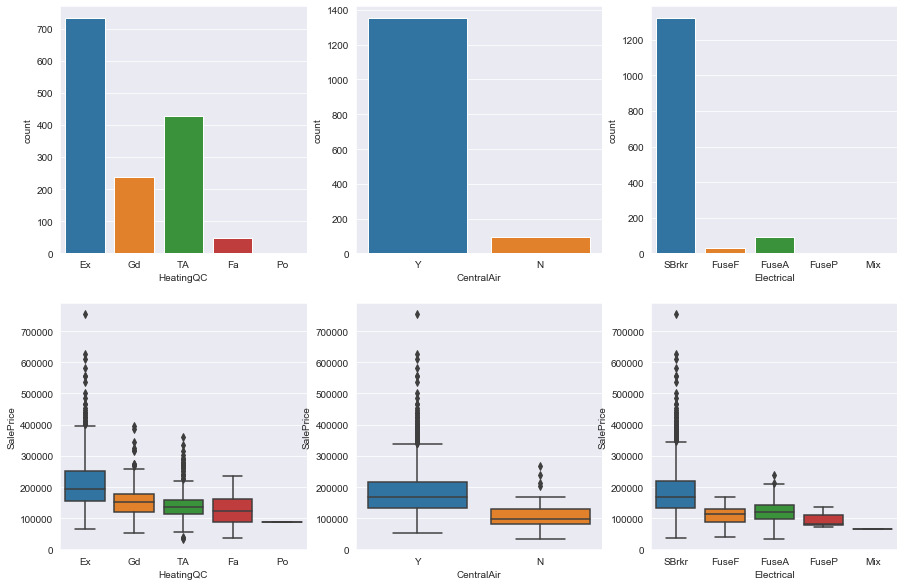

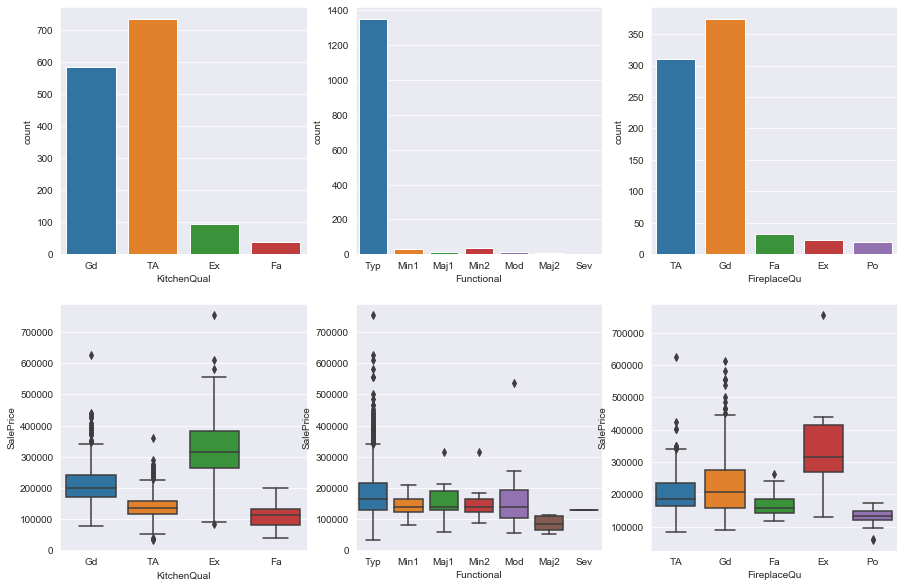

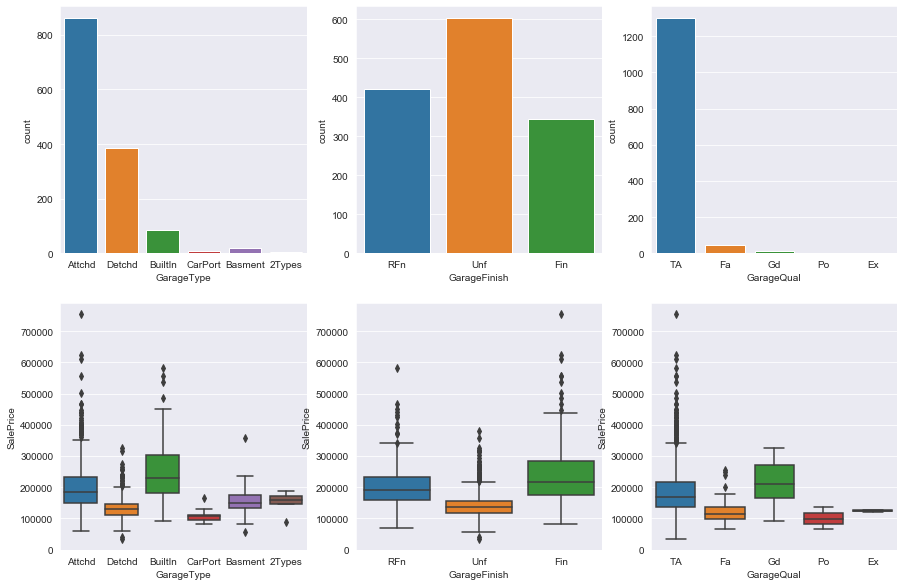

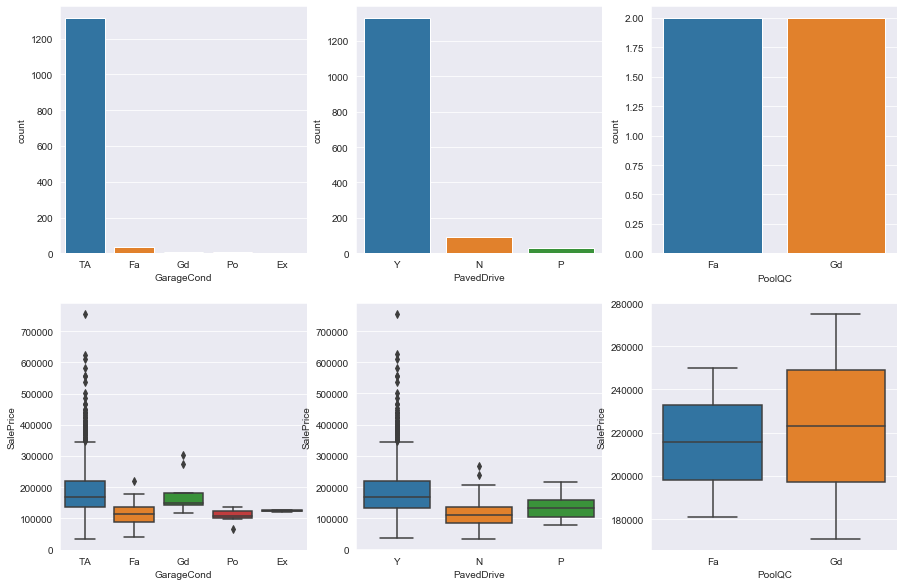

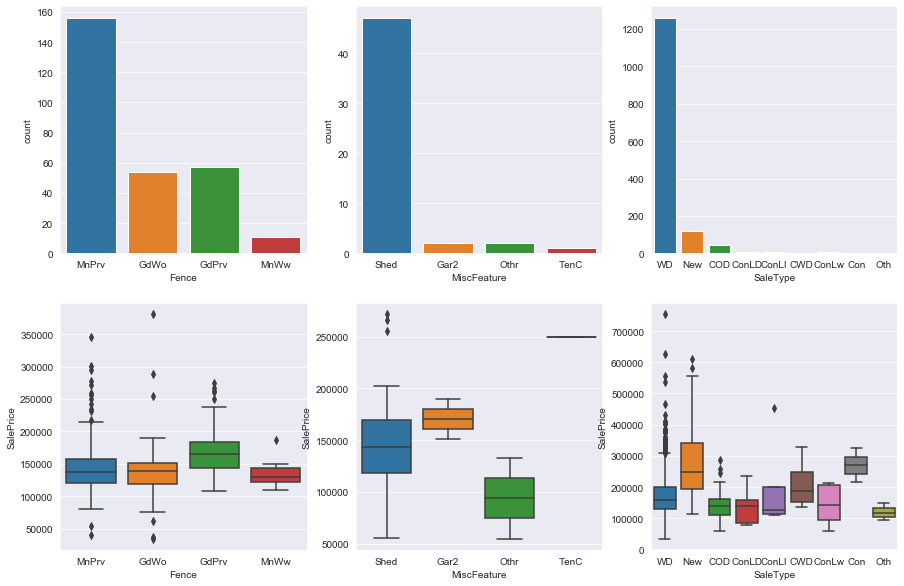

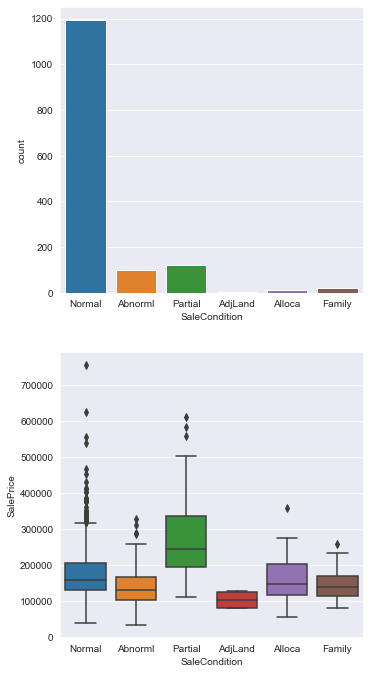

In [21]:
try:
    position = 1
    fig = plt.figure( figsize = (15,10) )

    for col in train_cat_vars.columns:
    
        if position <= 3:
        
        # Plotting a countplot and a boxplot below it for each categorical feature
        
            ax1 = fig.add_subplot(2 , 3 , position)
            chart1 = sns.countplot(data = train , x = col , ax = ax1)
        
            ax2 = fig.add_subplot(2 , 3 , position+3)
            chart2 = sns.boxplot(data = train , x = col, y = train['SalePrice'] , ax = ax2)
        
            if col in ['Neighborhood','Exterior1st','Exterior2nd','RoofMatl']:
            
                chart1.set_xticklabels(chart1.get_xticklabels() , rotation = 60)
                chart2.set_xticklabels(chart2.get_xticklabels() , rotation = 60)
            
            
        position += 1
        if position == 4: 
            fig = plt.figure( figsize = (15,10) )
            position = 1
        
    fig.tight_layout( pad = 3.0)

except ValueError:
    pass

Taking a closer look at the <code>Neighborhood</code> feature.

Text(0, 0.5, 'Frequency')

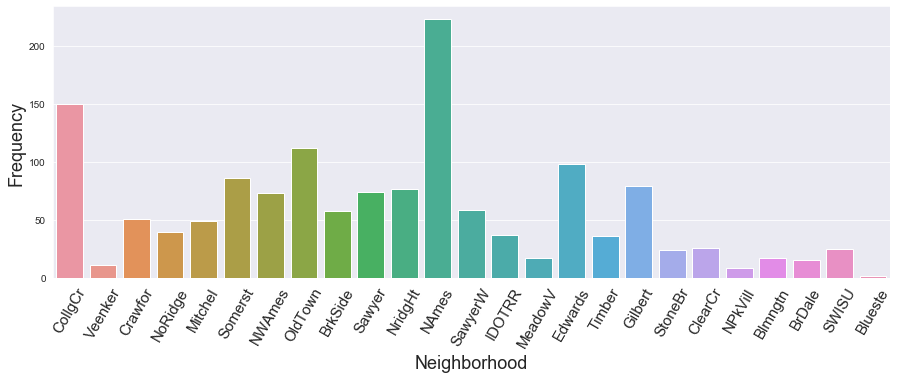

In [22]:
fig = plt.figure( figsize = (15,5) )
sns.countplot(x = 'Neighborhood' , data = train)
plt.xlabel('Neighborhood' , fontsize = 18)
plt.xticks(rotation = 60 , fontsize = 15)
plt.ylabel('Frequency' , fontsize = 18)

Text(0, 0.5, 'SalePrice')

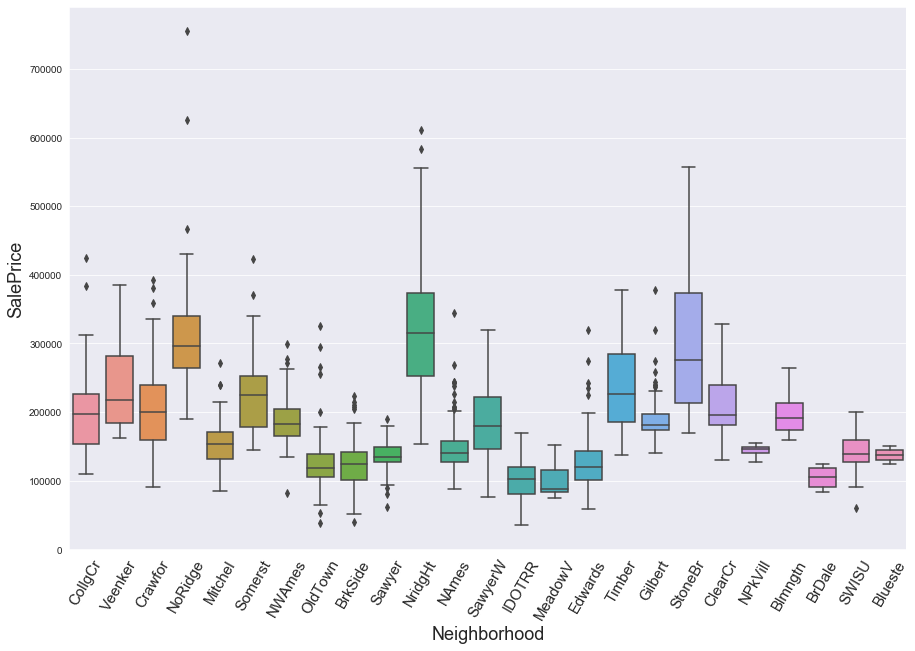

In [23]:
fig = plt.figure( figsize = (15,10) )
sns.boxplot(x = 'Neighborhood' , y = train['SalePrice'] , data = train)
plt.xlabel('Neighborhood' , fontsize = 18)
plt.xticks(rotation = 60 , fontsize = 15)
plt.ylabel('SalePrice' , fontsize = 18)

Now we combine the train and test sets and deal with **missing values** for numeric features

In [24]:
combined_data = pd.concat((train.drop('SalePrice' , axis = 1), test)).reset_index(drop = True)

In [25]:
assert train.shape[0] + test.shape[0] == combined_data.shape[0]

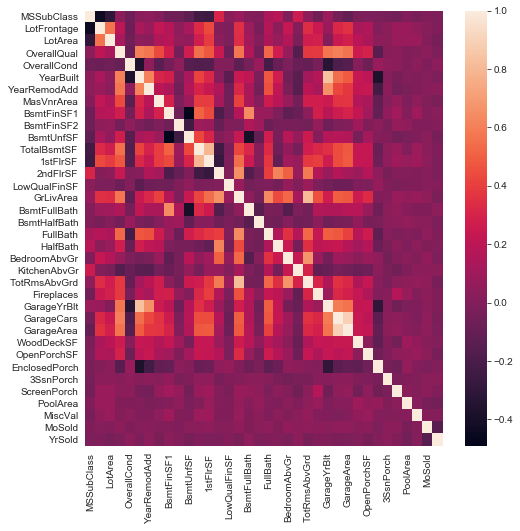

In [26]:
plt.figure(figsize=(8,8))
sns.heatmap(combined_data.corr() , linecolor='white') 

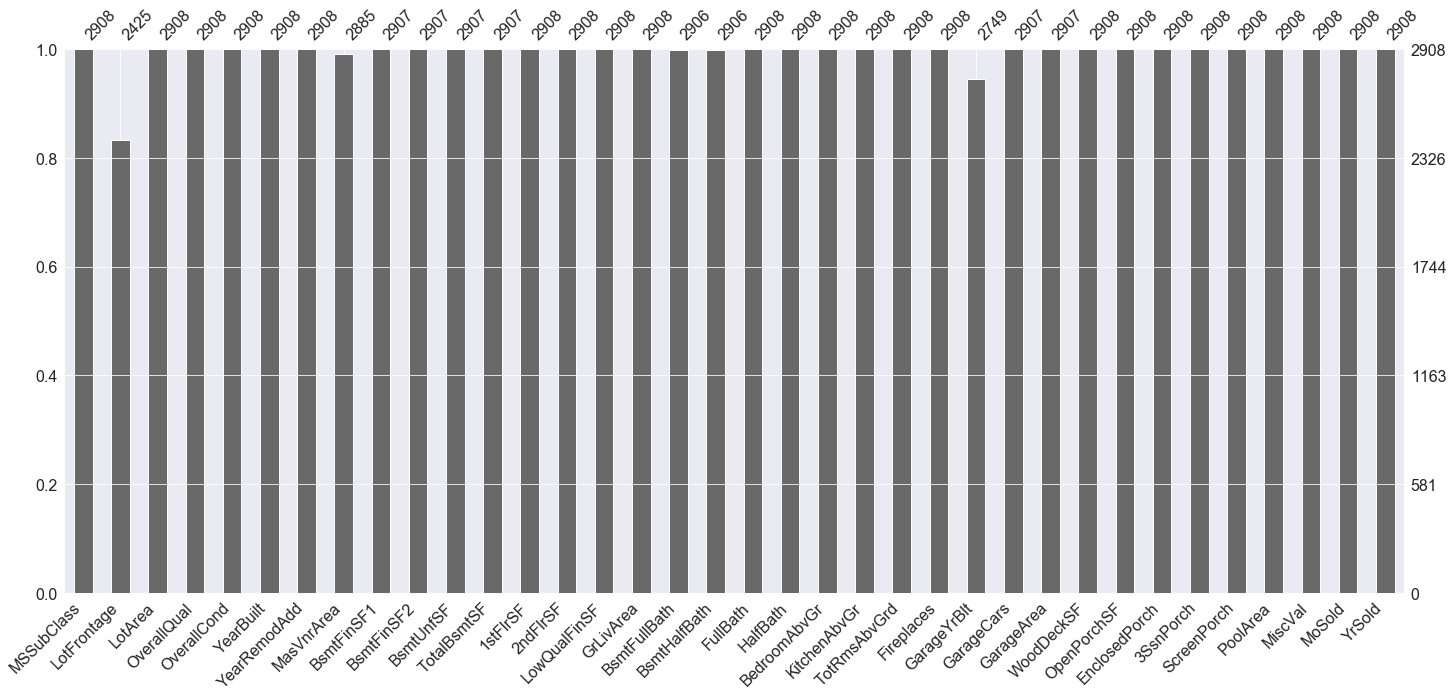

In [27]:
# We can see that the LotFrontage and GarageYrBlt have a number of missing values
msno.bar(combined_data.select_dtypes(exclude = ['object']))

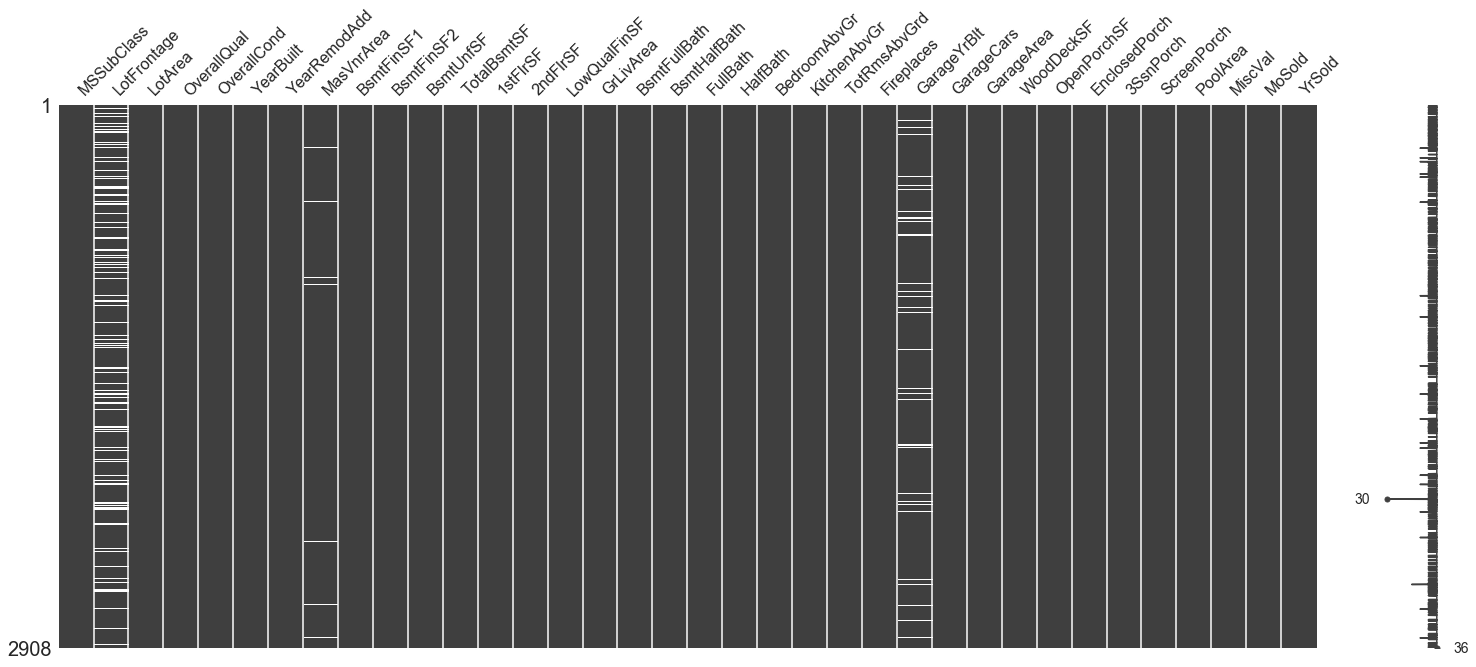

In [28]:
# We investigate further the distribution of the missing values columns (white lines show missing values)
msno.matrix(combined_data.select_dtypes(exclude = ['object']))

Since we expect neighborhood to be correlated with 'LotFrontage: Linear feet of street connected to property' , we will impute NaNs with the median LotFrontage value for each Neighborhood 

In [29]:
def LotFrontage_fillnan():
    
    # Creating a series of the median LotFrontage value for each neighborhood
    neighb_median_vals = combined_data.groupby('Neighborhood').median()['LotFrontage']
    
    # convert the above series to a dictionary
    dic = neighb_median_vals.to_dict()
    
    for i in range(len(combined_data)):
        
        if np.isnan( combined_data.iloc[i,combined_data.columns.get_loc('LotFrontage')] ):
            
            dict_key = combined_data.iloc[ i , combined_data.columns.get_loc('Neighborhood') ]
            
            # Assigning the median value to each NaN entry
            combined_data.iloc[i,combined_data.columns.get_loc('LotFrontage')] = round( dic[dict_key] , 2)
    
   
    print('Replacing NaNs with the median value of the corresponding neighborhood..')
    print('*'*80)
    print(f'LotFrontage column now has {combined_data.LotFrontage.isnull().sum()} missing values')

In [30]:
LotFrontage_fillnan()

Replacing NaNs with the median value of the corresponding neighborhood..
********************************************************************************
LotFrontage column now has 0 missing values


In [31]:
combined_data.corr()['GarageYrBlt'].sort_values(ascending = False).head()

GarageYrBlt     1.000000
YearBuilt       0.836036
YearRemodAdd    0.653825
GarageCars      0.588469
OverallQual     0.573540
Name: GarageYrBlt, dtype: float64

Text(0, 0.5, 'YearBuilt')

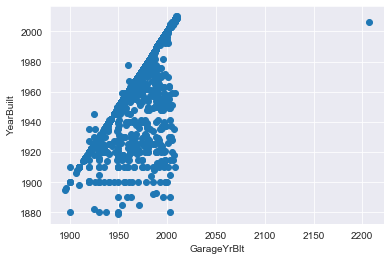

In [32]:
plt.scatter(x = combined_data['GarageYrBlt'] , y = combined_data['YearBuilt'])
plt.xlabel('GarageYrBlt') 
plt.ylabel('YearBuilt')

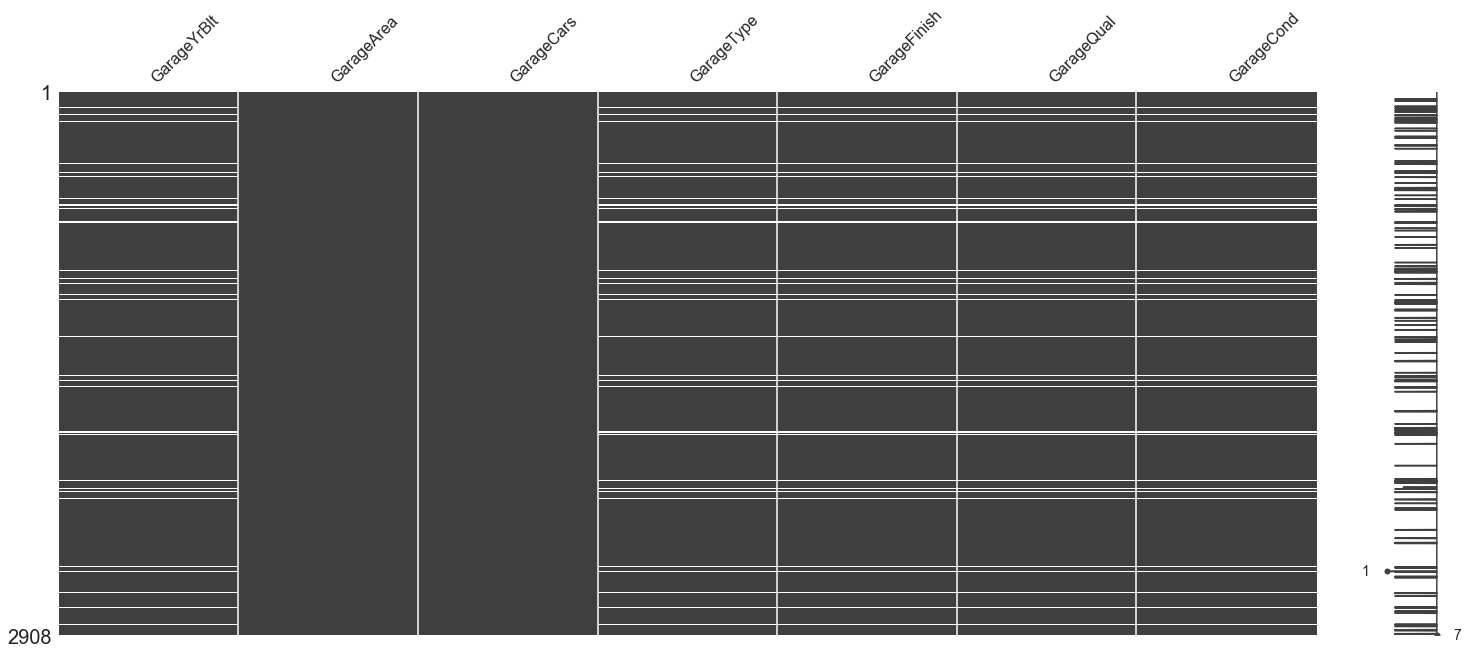

In [33]:
gar_features = ['GarageYrBlt', 'GarageArea', 'GarageCars','GarageType','GarageFinish','GarageQual','GarageCond']
msno.matrix(combined_data[gar_features])

Although, it seemed reasonable at first to fill the <code>GarageYrBlt</code> column with the <code>YearBlt</code> column, after exploring Garage type features a bit further, it now seems a better idea to fill NaN values for all of the Garage type columns with 'None'. 

In [34]:
for col in gar_features:
    
    if col != 'GarageArea': 
        combined_data[col].fillna('None' , inplace = True)
        
    else:
        combined_data[col].fillna(0 , inplace = True)
    
    print('Replacing NaNs..')
    print(f'{col} column now has {combined_data[col].isnull().sum()} missing values')
    print('*'*30)

Replacing NaNs..
GarageYrBlt column now has 0 missing values
******************************
Replacing NaNs..
GarageArea column now has 0 missing values
******************************
Replacing NaNs..
GarageCars column now has 0 missing values
******************************
Replacing NaNs..
GarageType column now has 0 missing values
******************************
Replacing NaNs..
GarageFinish column now has 0 missing values
******************************
Replacing NaNs..
GarageQual column now has 0 missing values
******************************
Replacing NaNs..
GarageCond column now has 0 missing values
******************************


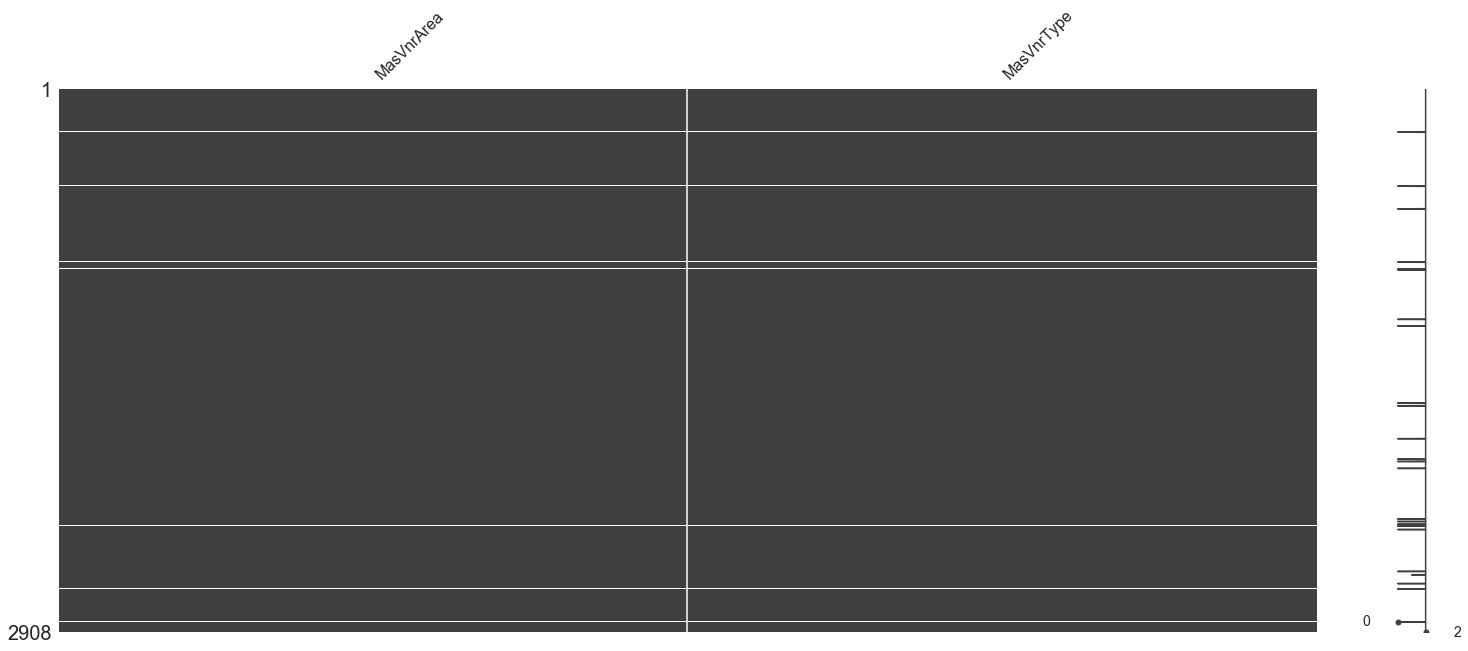

In [35]:
msno.matrix(combined_data[['MasVnrArea','MasVnrType']])


Observing that the two features have missing values at exactly the same rows, we can conclude that such houses are unlikely to have a Masonry veneer and so we fill NaNs in the MasVnrArea with a zero. 

In [36]:
combined_data['MasVnrArea'].fillna(0 , inplace = True)

In [37]:
# Missing values here are likely to be zero for having no basement
for col in ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF','BsmtFullBath', 'BsmtHalfBath']:
    combined_data[col] = combined_data[col].fillna(0)

In [38]:
combined_data.select_dtypes(include = ['float64' , 'int64']).isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

Now we deal with <code>categorical</code> features missing values

In [39]:
# There are missing values in 19 categorical features
combined_data.select_dtypes(include = ['object']).isna().sum().sort_values(ascending=False).head(20)

PoolQC          2901
MiscFeature     2805
Alley           2710
Fence           2340
FireplaceQu     1420
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MSZoning           4
Functional         2
Utilities          2
Exterior2nd        1
KitchenQual        1
Electrical         1
Exterior1st        1
SaleType           1
Neighborhood       0
dtype: int64

In [40]:
# Create a list of the names of categorical features with missing values
missing_cat_names = [ combined_data.isna().any().index[i] 
                     for i in range(len(combined_data.columns)) 
                     if combined_data.isna().any()[i] ]

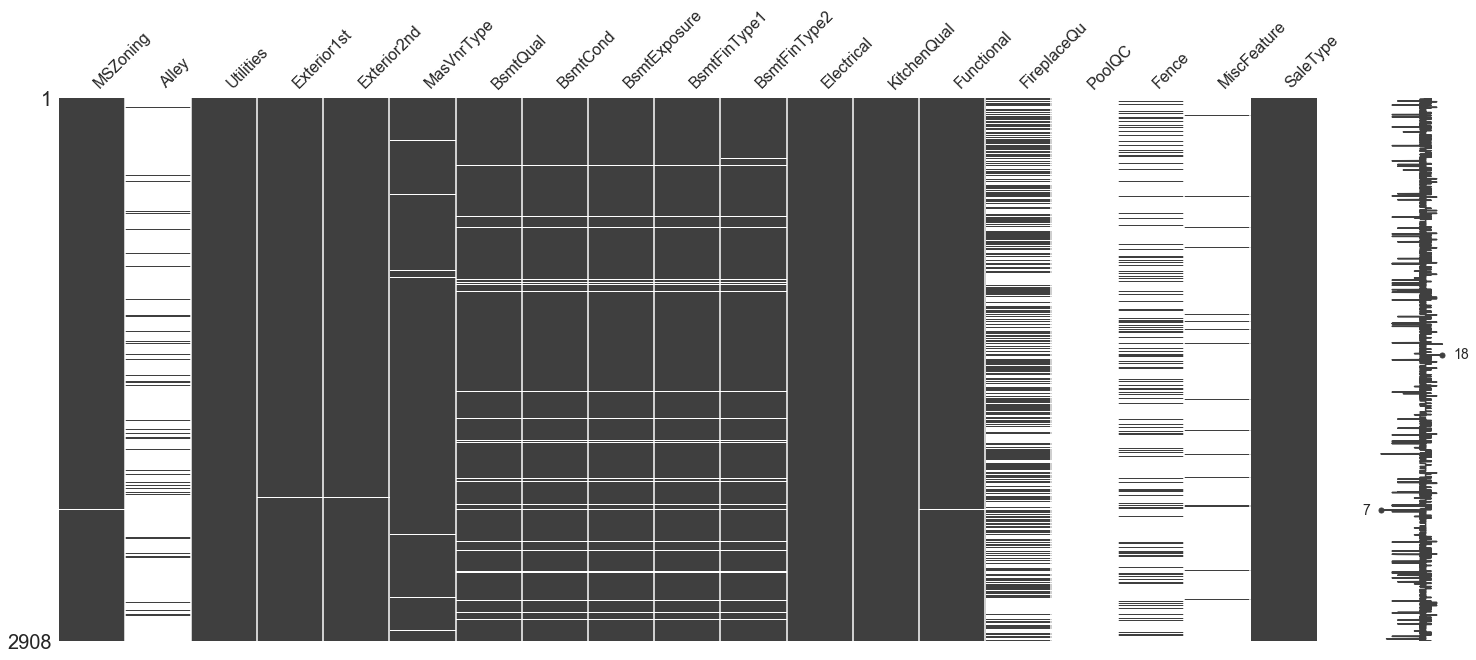

In [41]:
# Now let's check the distribution of missing value categorical feature 
msno.matrix(combined_data[missing_cat_names])

In [42]:
# Let's feel NaNs in PoolQC with 'None' since data description says 'NA' means no pool
combined_data['PoolQC'].fillna('None' , inplace = True)
print(f'PoolQC column now has {combined_data.PoolQC.isnull().sum()} missing values','\n')

PoolQC column now has 0 missing values 



We fill the very few missing values in the features below with the respective mode for each feature

In [43]:
for col in ['Electrical','KitchenQual','MSZoning','Exterior1st','Exterior2nd','SaleType']:
    
    combined_data[col].fillna(combined_data[col].mode()[0] , inplace = True)
    

In [44]:
# Data description mentions that in 'Functional', NA means Typical
combined_data['Functional'].fillna('Typical' , inplace = True)

In [45]:
# Since almost all of the 'Utilities' are AllPub, we drop the feature as it doesn't really help
combined_data['Utilities'].value_counts()

AllPub    2905
NoSeWa       1
Name: Utilities, dtype: int64

In [46]:
combined_data.drop('Utilities' , axis = 1 , inplace = True)

The above missing values distribution plot indicates that missing values in *Basement* related features occur simultaneously in all features which suggests that perhaps the house does not have a basement at all. A similar explanation seems plausible for *Garage* related features also. 
 Noting also that from previous work <code>MasVnrType</code> and <code>MasVnrArea</code> features have missing values in exactly the same places, we follow the above reasoning.
 For the rest of the features, we can't really do any better than filling them with 'None'.
 
Hence, to me it seems reasonable to fill these missing values with 'None'

In [47]:
# Updating the missing value features and filling them with 'None'
missing_cat_names_upd = [ combined_data.isna().any().index[i] 
                     for i in range(len(combined_data.columns)) 
                     if combined_data.isna().any()[i] ]

for col in missing_cat_names_upd:
    
    combined_data[col].fillna('None' , inplace = True)
        
    print(f'{col} column now has {combined_data[col].isnull().sum()} missing values')

Alley column now has 0 missing values
MasVnrType column now has 0 missing values
BsmtQual column now has 0 missing values
BsmtCond column now has 0 missing values
BsmtExposure column now has 0 missing values
BsmtFinType1 column now has 0 missing values
BsmtFinType2 column now has 0 missing values
FireplaceQu column now has 0 missing values
Fence column now has 0 missing values
MiscFeature column now has 0 missing values


In [48]:
# Final check that no feature in the train set has a NaN value
assert False not in combined_data.notnull().any().values 

We take the log(1+x) of the target variable (SalePrice) since our predictions will be evaluated using the Root Mean Squared Log Error (RMSLE). You can find out more about RMSLE [here](https://medium.com/analytics-vidhya/root-mean-square-log-error-rmsle-vs-rmlse-935c6cc1802a).

In [49]:
log_ytrain = np.log1p(train['SalePrice']).values

#### Let's now move to the Feature engineering

The following features we converted to floats in previous calculations and so we convert them back to integers as they are categorical features in fact

In [50]:
cols_to_round = ['BsmtFullBath' , 'BsmtHalfBath', 'FullBath', 'HalfBath','BedroomAbvGr','KitchenAbvGr',
       'TotRmsAbvGrd','Fireplaces']
for col in cols_to_round:
    combined_data[col] = combined_data[col].round()
    combined_data[col] = combined_data[col].astype(int)

Transforming some numerical features that are categorical in fact

In [51]:
combined_data['MSSubClass'] = combined_data['MSSubClass'].apply(str)

combined_data['OverallCond'] = combined_data['OverallCond'].astype(str)

combined_data['YrSold'] = combined_data['YrSold'].astype(str)
combined_data['MoSold'] = combined_data['MoSold'].astype(str)
combined_data['GarageArea'] = combined_data['GarageArea'].astype(int)
combined_data['OverallQual'] = combined_data['OverallQual'].astype(str)
combined_data['YearBuilt'] = combined_data['YearBuilt'].astype(str)
combined_data['YearRemodAdd'] = combined_data['YearRemodAdd'].astype(str)

In [52]:
# Adding total sqfootage feature which seems to be an important feature
combined_data['TotalSF'] = combined_data['TotalBsmtSF'] + combined_data['1stFlrSF'] + combined_data['2ndFlrSF']

We can see that 13 numerical features have a positive skewness coefficient of above 1.
You can read about the Scipy documentation of the box-cox transformation used to normalise the data [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.boxcox1p.html).

In [53]:
from scipy.stats import skew, boxcox_normmax
from scipy.special import boxcox1p

# We only transform continuous numerical features
numerical_feats = combined_data.select_dtypes(include=['float64','int64']).columns

# Check the skew of all numerical features
skewed_feats = combined_data[numerical_feats].apply(lambda col: skew(col.dropna())).sort_values(ascending=False)

skewness = pd.DataFrame({'Skewness before transforming' :skewed_feats})
skewness.head(14)

,Skewness before transforming
MiscVal,21.928921
PoolArea,19.814292
LowQualFinSF,12.661153
3SsnPorch,11.354131
LotArea,5.332076
KitchenAbvGr,4.292873
BsmtFinSF2,4.157267
BsmtHalfBath,3.951883
EnclosedPorch,3.949684
ScreenPorch,3.926054


In [54]:
highly_skewed = skewed_feats[np.abs(skewed_feats) > 0.5]

skewed_index = skewed_feats.index

for col in skewed_index:
    # we apply the transformation and obtain the optimal lambda value using boxcox_normmax
    # Note that we add 1 to the data to make all values > 0 inside the boxcox_normmax function
    combined_data[col] = boxcox1p(combined_data[col], boxcox_normmax(combined_data[col]+1))

In [55]:
skewness_upd = combined_data[numerical_feats].apply(lambda col: skew(col.dropna())).sort_values(ascending=False)

In [56]:
skewness['Skewness after transforming'] = skewness_upd

In [57]:
# Taking a look at the difference
skewness

,Skewness before transforming,Skewness after transforming
MiscVal,21.928921,5.284140
PoolArea,19.814292,17.069111
LowQualFinSF,12.661153,8.707396
3SsnPorch,11.354131,8.848083
LotArea,5.332076,-0.038089
KitchenAbvGr,4.292873,3.771309
BsmtFinSF2,4.157267,2.587434
BsmtHalfBath,3.951883,3.798580
EnclosedPorch,3.949684,2.144994
ScreenPorch,3.926054,3.153379


We now perform <b>dummy variable</b> encoding on combined_data 

In [58]:
print(combined_data.shape)

(2908, 79)


In [59]:
combined_data = pd.get_dummies(combined_data , drop_first=True)
print(combined_data.shape)

(2908, 583)


In [60]:
combined_data.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,TotalSF,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_10,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,YearBuilt_1875,YearBuilt_1879,YearBuilt_1880,YearBuilt_1882,YearBuilt_1885,YearBuilt_1890,YearBuilt_1892,YearBuilt_1893,YearBuilt_1895,YearBuilt_1896,YearBuilt_1898,YearBuilt_1900,YearBuilt_1901,YearBuilt_1902,YearBuilt_1904,YearBuilt_1905,YearBuilt_1906,YearBuilt_1907,YearBuilt_1908,YearBuilt_1910,YearBuilt_1911,YearBuilt_1912,YearBuilt_1913,YearBuilt_1914,YearBuilt_1915,YearBuilt_1916,YearBuilt_1917,YearBuilt_1918,YearBuilt_1919,YearBuilt_1920,YearBuilt_1921,YearBuilt_1922,YearBuilt_1923,YearBuilt_1924,YearBuilt_1925,YearBuilt_1926,YearBuilt_1927,YearBuilt_1928,YearBuilt_1929,YearBuilt_1930,YearBuilt_1931,YearBuilt_1932,YearBuilt_1934,YearBuilt_1935,YearBuilt_1936,YearBuilt_1937,YearBuilt_1938,YearBuilt_1939,YearBuilt_1940,YearBuilt_1941,YearBuilt_1942,YearBuilt_1945,YearBuilt_1946,YearBuilt_1947,YearBuilt_1948,YearBuilt_1949,YearBuilt_1950,YearBuilt_1951,YearBuilt_1952,YearBuilt_1953,YearBuilt_1954,YearBuilt_1955,YearBuilt_1956,YearBuilt_1957,YearBuilt_1958,YearBuilt_1959,YearBuilt_1960,YearBuilt_1961,YearBuilt_1962,YearBuilt_1963,YearBuilt_1964,YearBuilt_1965,YearBuilt_1966,YearBuilt_1967,YearBuilt_1968,YearBuilt_1969,YearBuilt_1970,YearBuilt_1971,YearBuilt_1972,YearBuilt_1973,YearBuilt_1974,YearBuilt_1975,YearBuilt_1976,YearBuilt_1977,YearBuilt_1978,YearBuilt_1979,YearBuilt_1980,YearBuilt_1981,YearBuilt_1982,YearBuilt_1983,YearBuilt_1984,YearBuilt_1985,YearBuilt_1986,YearBuilt_1987,YearBuilt_1988,YearBuilt_1989,YearBuilt_1990,YearBuilt_1991,YearBuilt_1992,YearBuilt_1993,YearBuilt_1994,YearBuilt_1995,YearBuilt_1996,YearBuilt_1997,YearBuilt_1998,YearBuilt_1999,YearBuilt_2000,YearBuilt_2001,YearBuilt_2002,YearBuilt_2003,YearBuilt_2004,YearBuilt_2005,YearBuilt_2006,YearBuilt_2007,YearBuilt_2008,YearBuilt_2009,YearBuilt_2010,YearRemodAdd_1951,YearRemodAdd_1952,YearRemodAdd_1953,YearRemodAdd_1954,YearRemodAdd_1955,YearRemodAdd_1956,YearRemodAdd_1957,YearRemodAdd_1958,YearRemodAdd_1959,YearRemodAdd_1960,YearRemodAdd_1961,YearRemodAdd_1962,YearRemodAdd_1963,YearRemodAdd_1964,YearRemodAdd_1965,YearRemodAdd_1966,YearRemodAdd_1

### Modelling Part

##### Splitting the TRAIN data into training and validation sets

Only the linear models require the data to be scaled so we will create 2 train and 2 validation sets (scaled and unscaled). 

In [61]:
scaler = RobustScaler()

train_data = combined_data[:len(train)]
train_scaled = scaler.fit_transform(train_data)

test_data = combined_data[len(train):]
test_data_scaled = scaler.transform(test_data)

In [62]:
X_train , X_test , y_train , y_test = train_test_split(train_data , log_ytrain, 
                                            test_size = 0.20 , random_state = random_state)

print(f"X_train : {X_train.shape}")
print(f"X_test : {X_test.shape}")
print(f"y_train : {y_train.shape}")
print(f"y_test : {y_test.shape}")

X_train : (1159, 583)
X_test : (290, 583)
y_train : (1159,)
y_test : (290,)


In [63]:
# Transforming the training and test data
X_train_scaled , X_test_scaled = scaler.fit_transform(X_train) , scaler.transform(X_test)

In [64]:
# Create a list where train data indices are -1 and validation data indices are 0
split_index = [-1 if x in X_train.index else 0 for x in combined_data[:len(train)].index]

# Use the list to create PredefinedSplit where we only evaluate on the test set
ps = PredefinedSplit(test_fold = split_index)

In [65]:
# Setup cross validation folds

kf = KFold(n_splits = 10, random_state = random_state, shuffle = True)

# Define Error metrics

def rmsle(y , y_pred):
    # Setting squared to False will return the rmsle instead of the mse
    return mean_squared_error(y, y_pred , squared = False)

# This function returns the mean and st. deviation RMSLE

def cv_rmsle_train(model, X_train = X_train):
    
    rmsle = - cross_val_score(model , X_train , y_train , 
                             scoring = 'neg_root_mean_squared_error' , cv = kf)
    
    return rmsle.mean() , rmsle.std()


# Defining a function to get the RMSE on the validation set

def rmsle_test(model , X_test = X_test):
    
    model_pred = model.predict(X_test)
    
    return rmsle(y_test , model_pred)

#### We now fit the data using some relatively simple linear regression models

Linear regression CV RMSLE on Training set: 650099687.5730369 , Standard deviation: 1429423327.2818651
R^2 score on Training set: 0.9710966585774307

Linear regression RMSLE on Validation set : 0.17779233688412502
R^2 score on Validation set: 0.7997090247163372


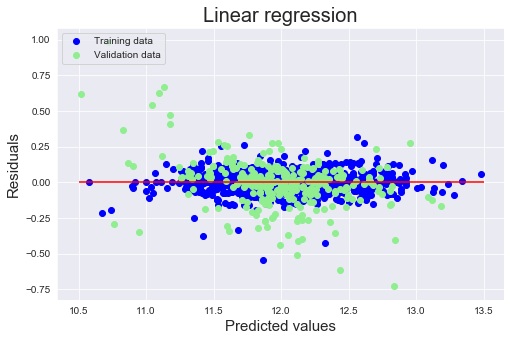

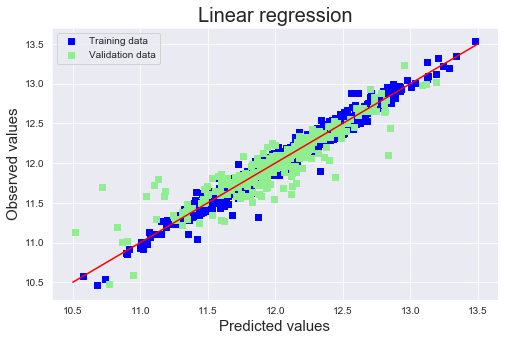

In [66]:
# Linear Regression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Look at predictions on training and validation set

y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)


r2_train = lr.score(X_train_scaled , y_train)
r2_test = lr.score(X_test_scaled , y_test)

rmsle_mean , rmsle_std = cv_rmsle_train(lr , X_train_scaled)

print(f'Linear regression CV RMSLE on Training set: {rmsle_mean} , Standard deviation: {rmsle_std}')
print(f'R^2 score on Training set: {r2_train}')


# Evaluating the accuracy of the model


print("\nLinear regression RMSLE on Validation set :", rmsle(y_test , y_test_pred))
print(f'R^2 score on Validation set: {r2_test}')


# Plot residuals (ideally, all residuals should be zero)

residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred


plt.figure(figsize=(8,5))
plt.scatter(y_train_pred , residuals_train , c = "blue",  label = "Training data")
plt.scatter(y_test_pred , residuals_test , c = "lightgreen", label = "Validation data")
plt.title("Linear regression" , fontsize = 20)
plt.xlabel("Predicted values" , fontsize = 15)
plt.ylabel("Residuals" , fontsize = 15)
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions (ideally, every point should be lying on the line y=x)

plt.figure(figsize=(8,5))
plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression" , fontsize = 20)
plt.xlabel("Predicted values" , fontsize = 15)
plt.ylabel("Observed values" , fontsize = 15)
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

Checking for homoscedasticity in the data (ie. whether the errors are random in the data).

First plot shows that the training set is relatively homoscedastic however the second plot indicates that the test set is heteroscedastic as the error is higher at the sides.

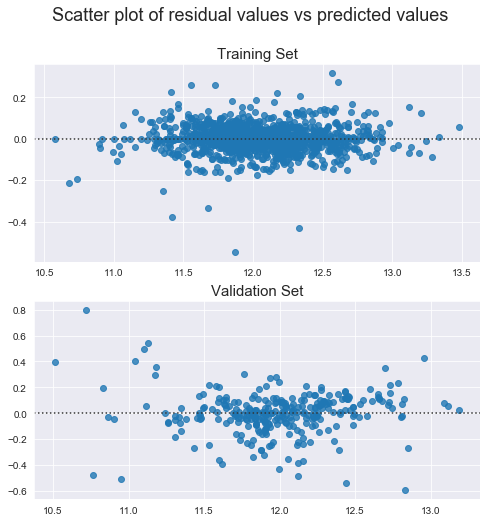

In [67]:
fig, axes = plt.subplots(2, 1 , figsize = (8,8))
fig.suptitle('Scatter plot of residual values vs predicted values' , fontsize = 18)

sns.residplot(y_train_pred , residuals_train , ax = axes[0] )
axes[0].set_title('Training Set' , fontsize = 15)

sns.residplot(y_test_pred , residuals_test , ax = axes[1])
axes[1].set_title('Validation Set' , fontsize = 15)
plt.show()

Best alpha : 10.0

Try again for more precision with alphas centered around 10.0

Best alpha: 11.5

Ridge CV RMSLE on Training set : 0.11778337547719622 , Standard deviation: 0.010768946852416259
Ridge R^2 score on Training set : 0.9482977310366244

Ridge RMSLE on Validation set : 0.11961179876207809
Ridge R^2 score on Validation set : 0.9093467564441733


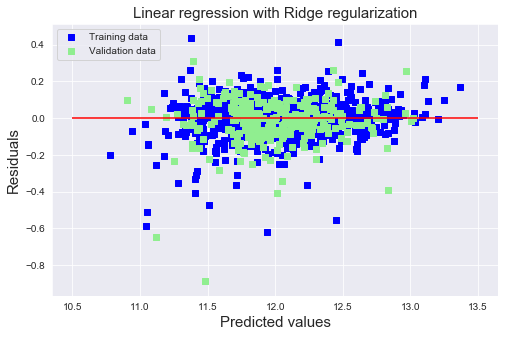

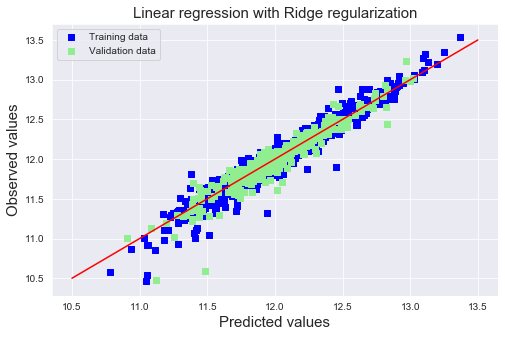

Ridge picked 558 features and eliminated the other 25 features


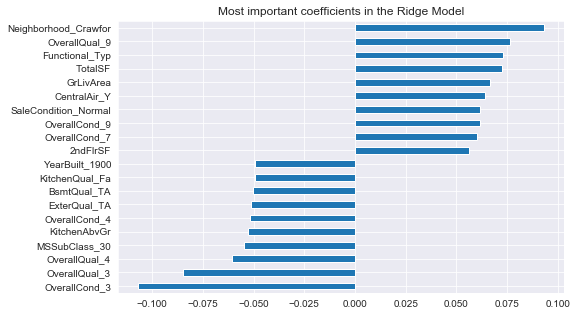

In [68]:
# Using a Ridge model

ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 15 ,20, 30,40,45,50,55, 60,80], 
                 cv = 10)


ridge.fit(X_train_scaled , y_train)


alpha = ridge.alpha_

print("Best alpha :", alpha)

print(f"\nTry again for more precision with alphas centered around {alpha}")

ridge = RidgeCV(alphas = [ alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.146, alpha * 1.3, alpha * 1.35, alpha * 1.4 ] , 
                
                            cv = 10)


ridge.fit(X_train_scaled , y_train)

# Ridge score is the R^2 coefficient (best score is 1 and score can also take negative values)

y_train_pred_ridge = ridge.predict(X_train_scaled)
y_test_pred_ridge = ridge.predict(X_test_scaled)

alpha = ridge.alpha_

rmsle_mean , rmsle_std = cv_rmsle_train(ridge , X_train_scaled)


print(f"\nBest alpha: {alpha}")

print(f'\nRidge CV RMSLE on Training set : {rmsle_mean} , Standard deviation: {rmsle_std}')  
print('Ridge R^2 score on Training set :',ridge.score(X_train_scaled , y_train))

print("\nRidge RMSLE on Validation set :", rmsle(y_test , y_test_pred_ridge))
print("Ridge R^2 score on Validation set :", ridge.score(X_test_scaled , y_test))




# Plot residuals

ridge_resid_train = y_train - y_train_pred_ridge
ridge_resid_test = y_test - y_test_pred_ridge


plt.figure(figsize=(8,5))
plt.scatter(y_train_pred_ridge, ridge_resid_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred_ridge, ridge_resid_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization" , fontsize = 15)
plt.xlabel("Predicted values" , fontsize = 15)
plt.ylabel("Residuals" , fontsize = 15)
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions

plt.figure(figsize=(8,5))
plt.scatter(y_train_pred_ridge, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred_ridge, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization" , fontsize = 15)
plt.xlabel("Predicted values" , fontsize = 15)
plt.ylabel("Observed values" , fontsize = 15)
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Plot important coefficients

coefs = pd.Series(ridge.coef_, index = combined_data.columns)

print(f"Ridge picked {sum(coefs != 0)} features and eliminated the other {sum(coefs == 0)} features")


important_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])


plt.figure(figsize=(8,5))
important_coefs.plot(kind = "barh")
plt.title("Most important coefficients in the Ridge Model")
plt.show()

In [69]:
ridge = Ridge(alpha = alpha)
ridge.fit(X_train_scaled , y_train)

Ridge(alpha=11.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Best alpha : 0.0006

Try again for more precision with alphas centered around 0.0006

Best alpha :0.00047999999999999996

Lasso CV RMSLE on Training set : 0.11783261278309443 , Standard deviation: 0.00968580233448728
Lasso R^2 score on Training set : 0.9398987871670618

Lasso RMSLE on Validation set : 0.11845478640081
Lasso R^2 score on Validation set : 0.9110920631045528


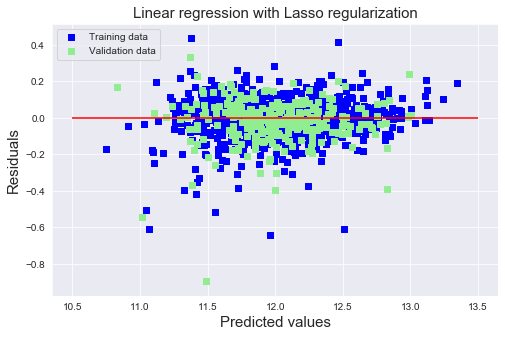

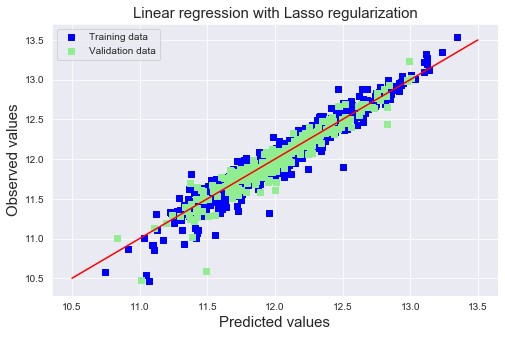

Lasso picked 150 features and eliminated the other 433 features


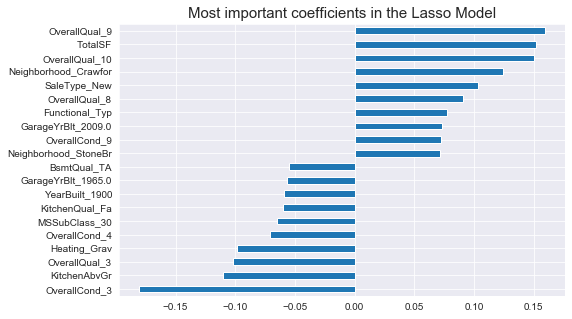

In [70]:
# Using a Lasso model

lasso = LassoCV(alphas = [0.00001 , 0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
                          0.3, 0.6, 1], 
                max_iter = 50000, cv = 10 , random_state = random_state)


lasso.fit(X_train_scaled , y_train)

alpha = lasso.alpha_

print("Best alpha :", alpha)

print(f"\nTry again for more precision with alphas centered around {alpha}")

lasso = LassoCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, 
                          alpha * .85, alpha * .9, alpha * .95, alpha, alpha * 1.05, 
                          alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, alpha * 1.35, 
                          alpha * 1.4] , 
                max_iter = 50000, cv = 10 , random_state = random_state)


lasso.fit(X_train_scaled , y_train)

# Lasso score is the R^2 coefficient (best score is 1 and score can also take negative values)

alpha = lasso.alpha_

y_train_pred_lasso = lasso.predict(X_train_scaled)
y_test_pred_lasso = lasso.predict(X_test_scaled)

rmsle_mean , rmsle_std = cv_rmsle_train(lasso , X_train_scaled)


print(f"\nBest alpha :{alpha}")

print(f'\nLasso CV RMSLE on Training set : {rmsle_mean} , Standard deviation: {rmsle_std}') 
print('Lasso R^2 score on Training set :',lasso.score(X_train_scaled ,y_train))

print("\nLasso RMSLE on Validation set :", rmsle(y_test , y_test_pred_lasso))
print("Lasso R^2 score on Validation set :", lasso.score(X_test_scaled ,y_test))




# Plot residuals

lasso_resid_train = y_train - y_train_pred_lasso
lasso_resid_test = y_test - y_test_pred_lasso


plt.figure(figsize=(8,5))
plt.scatter(y_train_pred_lasso, lasso_resid_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred_lasso, lasso_resid_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Lasso regularization" , fontsize = 15)
plt.xlabel("Predicted values" , fontsize = 15)
plt.ylabel("Residuals" , fontsize = 15)
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions

plt.figure(figsize=(8,5))
plt.scatter(y_train_pred_lasso, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred_lasso, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Lasso regularization" , fontsize = 15)
plt.xlabel("Predicted values" , fontsize = 15)
plt.ylabel("Observed values" , fontsize = 15)
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Plot important coefficients

coefs = pd.Series(lasso.coef_, index = combined_data.columns)

print(f"Lasso picked {sum(coefs != 0)} features and eliminated the other {sum(coefs == 0)} features")


important_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])


plt.figure(figsize=(8,5))
important_coefs.plot(kind = "barh")
plt.title("Most important coefficients in the Lasso Model" , fontsize = 15)
plt.show()

In [71]:
lasso = Lasso(alpha = alpha)
lasso.fit(X_train_scaled , y_train)

Lasso(alpha=0.00047999999999999996, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Notice the difference regarding the reduction in the dimension of the feature space when comparing Ridge and Lasso regularization. Lasso makes unimportant feature coefficients <b>vanish</b> completely while Ridge just <b>shrinks</b> (however doesn't vanish) them close to zero.

Best l1_ratio : 0.1
Best alpha : 0.003
Try again for more precision with l1_ratio centered around 0.1


Best l1_ratio : 0.095
Best alpha : 0.003
Now try again for more precision on alpha, with l1_ratio fixed at 0.095 and alpha centered around 0.003


Best l1_ratio : 0.095
Best alpha : 0.00315


ElasticNet CV RMSLE on Training set : 0.11703374389923812, Standard deviation: 0.010035286206243867
ElasticNet R^2 score on Training set : 0.9430997975371076

ElasticNet RMSLE on Validation set : 0.11872228186429573
ElasticNet R^2 score on Validation set : 0.9106900646140859


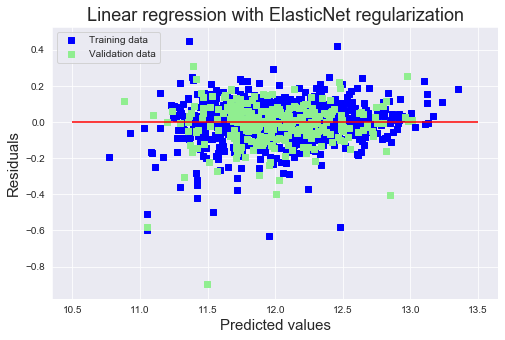

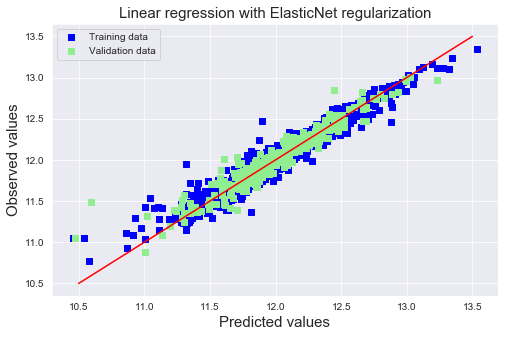

ElasticNet picked 219 features and eliminated the other 364 features


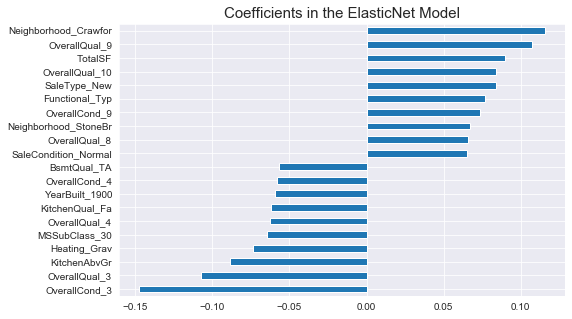

In [72]:
# Using an ElasticNet model (a combination of Lasso and Ridge) 

elasticNet = ElasticNetCV( l1_ratio = [0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9,0.925, 0.95,0.99, 1],
                          
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 
                                    0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6],
                          
                          max_iter = 50000 , cv = 10 , n_jobs = -1)


elasticNet.fit(X_train_scaled , y_train)


alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_

print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )


print(f"Try again for more precision with l1_ratio centered around {ratio}")
print("\n")


# Varying the l1_ratio while keeping alpha values as before

elasticNet = ElasticNetCV( 
    
    l1_ratio = [ratio * .85, ratio * .9, ratio * .95, ratio, ratio * 1.05, ratio * 1.1, ratio * 1.15],
                          
    alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6],
                          
                          max_iter = 50000 , cv = 10)



elasticNet.fit(X_train_scaled , y_train)



if elasticNet.l1_ratio_ > 1:
    
    elasticNet.l1_ratio_ = 1 
    
    
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_


print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print(f"Now try again for more precision on alpha, with l1_ratio fixed at {ratio} and alpha centered around {alpha}")
print("\n")      
    
      
elasticNet = ElasticNetCV( l1_ratio = ratio,
                          
            alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, alpha * .9, 
            alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, 
            alpha * 1.35, alpha * 1.4] , 
                          
                          max_iter = 50000, cv = 10)


elasticNet.fit(X_train_scaled , y_train)


if elasticNet.l1_ratio_ > 1:
    
    elasticNet.l1_ratio_ = 1  
    
    
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_


y_train_pred_ela = elasticNet.predict(X_train_scaled)
y_test_pred_ela = elasticNet.predict(X_test_scaled)

rmsle_mean , rmsle_std = cv_rmsle_train(elasticNet, X_train_scaled)


print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )
print("\n")

print(f'ElasticNet CV RMSLE on Training set : {rmsle_mean}, Standard deviation: {rmsle_std}')
print('ElasticNet R^2 score on Training set :',elasticNet.score(X_train_scaled , y_train))


print("\nElasticNet RMSLE on Validation set :" , rmsle(y_test , y_test_pred_ela))
print('ElasticNet R^2 score on Validation set :',elasticNet.score(X_test_scaled , y_test))




# Plot residuals

ela_resid_train = y_train - y_train_pred_ela
ela_resid_test = y_test - y_test_pred_ela


plt.figure(figsize=(8,5))
plt.scatter(y_train_pred_ela , ela_resid_train , c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred_ela , ela_resid_test , c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with ElasticNet regularization",fontsize = 18)
plt.xlabel("Predicted values", fontsize = 15)
plt.ylabel("Residuals", fontsize = 15)
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions

plt.figure(figsize=(8,5))
plt.scatter(y_train, y_train_pred_ela, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test, y_test_pred_ela, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with ElasticNet regularization",fontsize = 15)
plt.xlabel("Predicted values", fontsize = 15)
plt.ylabel("Observed values", fontsize = 15)
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Plot important coefficients

coefs = pd.Series(elasticNet.coef_ , index = combined_data.columns)

print(f"ElasticNet picked {sum(coefs != 0)} features and eliminated the other {sum(coefs == 0)} features")


imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])

plt.figure(figsize=(8,5))
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the ElasticNet Model" , fontsize = 15)
plt.show()

In [73]:
elasticNet = ElasticNet(alpha = alpha , l1_ratio = ratio)
elasticNet.fit(X_train_scaled , y_train)

ElasticNet(alpha=0.00315, copy_X=True, fit_intercept=True, l1_ratio=0.095,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

We can conclude that Lasso and ElasticNet models outperform the Ridge model based on their RMSLE and R^2 scores. Also, Lasso seems to perform slightly better than ElasticNet.

Now that we have already fine-tuned the **Ridge, ElasticNet & Lasso** models, let's move on to the other models too.

In [74]:
# Tuning LGBM Regressor via RandomizedSearchCV

optimize = False

# Set optimize to True to tune the LGBM model
if optimize:
     

    start_time = datetime.now()

    
    lgbm_params_grid = {'num_leaves':[3,5,6,8,15,30,50],
            'max_depth':[5,8,9,10,12,14,17,20,50,100],
            'min_data_in_leaf':[5,7,10,12,14,17,20,50],
            'learning_rate':[0.001,0.005,0.01,0.0125,0.013,0.015,0.1,0.125],
            'n_estimators':[4000,4500,5000,5500,6000,6500,7000,7500,8000],
            'max_bin':[15,30,40,50,75,100,200,500]}



    # Using the test set to perform the validation in GridSearch

    lgbm_grid_search = RandomizedSearchCV( LGBMRegressor(objective = 'regression' , boosting_type = 'dart',
                                             random_state = random_state ) , 
                               param_distributions = lgbm_params_grid , n_iter = 2000,
                                      scoring = 'neg_root_mean_squared_error' ,
                              refit = True , cv = ps )
    
# Fitting on the whole train set since we use our predefined split to validate only on the test set

    lgbm_grid_search.fit(train_data , log_ytrain)

    time_elapsed = datetime.now() - start_time 

    print(f'Time elapsed (hh:mm:ss.ms) {time_elapsed}','\n')
    print('Optimal hyperparameters found using RandomizedGridSearch:','\n \n' , lgbm_grid_search.best_params_,'\n')

In [75]:
if optimize:
    
    # DataFrame of the parameters of the best 5 validation scores

    display(pd.DataFrame(lgbm_grid_search.cv_results_).sort_values('rank_test_score',ascending=True).head())

In [76]:
# The optimal hyperparameters found after tuning (and also with some trial and error!) 

lightgbm = LGBMRegressor(objective='regression', 
                       num_leaves=3,
                       learning_rate=0.0125, 
                       n_estimators=6000,
                       max_bin=75,
                       max_depth=100,
                       min_data_in_leaf=14,
                       bagging_fraction=0.8,
                       bagging_freq=4, 
                       bagging_seed=8,
                       feature_fraction=0.21,
                       feature_fraction_seed=8,
                       min_sum_hessian_in_leaf = 11,
                       verbose=-1,
                       random_state=random_state,n_jobs=-1)


In [77]:
lightgbm.fit( X_train, y_train , eval_set = [ (X_train , y_train) , (X_test , y_test) ] )

[1]	training's l2: 0.154036	valid_1's l2: 0.157626
[2]	training's l2: 0.152752	valid_1's l2: 0.156297
[3]	training's l2: 0.150985	valid_1's l2: 0.154498
[4]	training's l2: 0.148901	valid_1's l2: 0.152504
[5]	training's l2: 0.14691	valid_1's l2: 0.150609
[6]	training's l2: 0.145435	valid_1's l2: 0.149116
[7]	training's l2: 0.143854	valid_1's l2: 0.147695
[8]	training's l2: 0.142304	valid_1's l2: 0.14612
[9]	training's l2: 0.140955	valid_1's l2: 0.144722
[10]	training's l2: 0.139121	valid_1's l2: 0.142961
[11]	training's l2: 0.1378	valid_1's l2: 0.141771
[12]	training's l2: 0.136426	valid_1's l2: 0.14048
[13]	training's l2: 0.134964	valid_1's l2: 0.139087
[14]	training's l2: 0.133408	valid_1's l2: 0.13754
[15]	training's l2: 0.132336	valid_1's l2: 0.136471
[16]	training's l2: 0.13114	valid_1's l2: 0.135298
[17]	training's l2: 0.129837	valid_1's l2: 0.134148
[18]	training's l2: 0.128564	valid_1's l2: 0.132951
[19]	training's l2: 0.127264	valid_1's l2: 0.131689
[20]	training's l2: 0.125997

LGBMRegressor(bagging_fraction=0.8, bagging_freq=4, bagging_seed=8,
              boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              feature_fraction=0.21, feature_fraction_seed=8,
              importance_type='split', learning_rate=0.0125, max_bin=75,
              max_depth=100, min_child_samples=20, min_child_weight=0.001,
              min_data_in_leaf=14, min_split_gain=0.0,
              min_sum_hessian_in_leaf=11, n_estimators=6000, n_jobs=-1,
              num_leaves=3, objective='regression', random_state=42,
              reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0, verbose=-1)

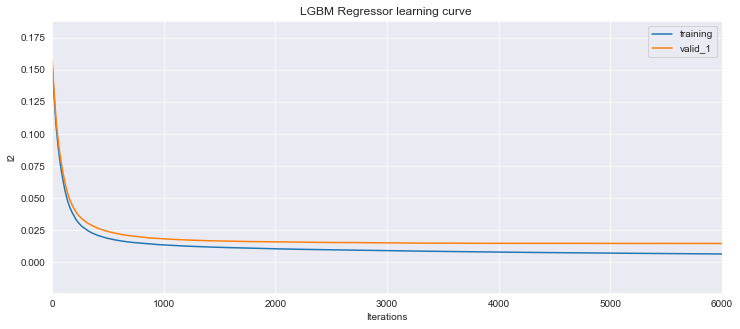

In [78]:
# This plot shows the l2 score learning curve during training and validation
lgb.plot_metric(lightgbm , figsize=(12,5),title ='LGBM Regressor learning curve ', ylabel='l2', xlabel='Iterations')

In [79]:
rmsle(y_train,lightgbm.predict(X_train))

0.08043238561353186

In [80]:
rmsle_test(lightgbm)

0.12102539485222011

In [81]:
# Let's now tune the SVR model using GridSearchCV because of the model's relatively few hyperparameters 

optimize = False

# Set optimize to True to tune the SVR model

if optimize:

    start_time = datetime.now()

    
    svr_params_grid = { 'epsilon':[0.0001,0.001,0.003,0.005,0.008,0.01,0.05 , 0.0855],
        
        
                        'C':np.arange(5,55,5) ,
                       
                        'gamma':[0.0000013,0.0000014,0.00000125,0.0000015,0.00000175,0.000002] }
                       

    # Using the test set to perform the validation in GridSearch

    svr_grid_search = GridSearchCV( SVR() , param_grid = svr_params_grid ,
                                      scoring = 'neg_root_mean_squared_error' ,
                                      refit = True , cv = ps )

    svr_grid_search.fit(train_data , log_ytrain)

    time_elapsed = datetime.now() - start_time 

    print(f'Time elapsed (hh:mm:ss.ms) {time_elapsed}','\n')
    print('Optimal hyperparameters found using GridSearchCV:','\n \n' , svr_grid_search.best_params_ ,'\n')

In [82]:
if optimize:
    
    # DataFrame of the parameters of the best 5 validation scores

    display(pd.DataFrame(svr_grid_search.cv_results_).sort_values('rank_test_score',ascending=True).head())

In [83]:
# Optimal SVR hyperparameters found above

svr = SVR (C = 50 , epsilon = 0.0855 , gamma = 1.25e-06)

In [84]:
svr.fit(X_train , y_train)

SVR(C=50, cache_size=200, coef0=0.0, degree=3, epsilon=0.0855, gamma=1.25e-06,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [85]:
display(rmsle(y_train,svr.predict(X_train)),rmsle_test(svr , X_test))

0.15549019035348152

0.1877867152695472

In [86]:
# Tuning the RF Regressor via RandomizedSearchCV

optimize = False

# Set optimize to True to tune the RF model
if optimize:
    

    from datetime import datetime 

    start_time = datetime.now()

    
    # Number of trees in random forest
    n_estimators = [int(x) for x in np.linspace(start = 200, stop = 10000, num = 30)]
    
    # Number of features to consider at every split
    max_features = ['auto', 'sqrt','log2']
    
    # Maximum number of levels in tree
    max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
    max_depth.append(None)
    
    # Minimum number of samples required to split a node
    min_samples_split = [2, 5, 7,10,15,20,30,50,100,200,500]
    
    # Minimum number of samples required at each leaf node
    min_samples_leaf = [1,2, 4,5,8,10,12,15,20]
    
    # Method of selecting samples for training each tree
    bootstrap = [True, False]
    
    
    # Create the parameter grid
    rf_param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}



    # Using the test set to perform the validation in RandomizedSearch

    rf_grid_search = RandomizedSearchCV( RandomForestRegressor(oob_score = True,
                                        random_state = random_state) , 
                               param_distributions = rf_param_grid , n_iter = 750,
                                      scoring = 'neg_root_mean_squared_error' ,
                              refit = True , cv = ps , random_state = random_state )

    rf_grid_search.fit(train_data , log_ytrain)

    time_elapsed = datetime.now() - start_time 

    print(f'Time elapsed (hh:mm:ss.ms) {time_elapsed}','\n')
    print('Optimal hyperparameters found using RandomizedGridSearch:','\n \n' , rf_grid_search.best_params_,'\n')

In [87]:
if optimize:
    
    # DataFrame of the parameters of the best 5 validation scores

    display(pd.DataFrame(rf_grid_search.cv_results_).sort_values('rank_test_score',ascending=True).head())

In [88]:
# Random Forest regressor with the optimal hyperparameters found above

rf = RandomForestRegressor(n_estimators=79,
                           min_samples_split=2,
                           min_samples_leaf=2,
                           max_depth=20,
                           max_features='auto',
                           bootstrap=True,
                           oob_score=True,
                           random_state=random_state)

rf.fit(X_train , y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=79, n_jobs=None, oob_score=True,
                      random_state=42, verbose=0, warm_start=False)

In [89]:
display(rmsle(y_train,rf.predict(X_train)),rmsle_test(rf))

0.06693995682241581

0.14691181813892712

In [90]:
# Stack up all the models above, optimized using the elasticNet meta regressor

stacked_reg = StackingRegressor(regressors = (lightgbm , lasso, elasticNet  , ridge),
                                meta_regressor = elasticNet, refit = True,
                                use_features_in_secondary = True)


stacked_reg.fit(X_train, y_train)

StackingRegressor(meta_regressor=ElasticNet(alpha=0.00315, copy_X=True,
                                            fit_intercept=True, l1_ratio=0.095,
                                            max_iter=1000, normalize=False,
                                            positive=False, precompute=False,
                                            random_state=None,
                                            selection='cyclic', tol=0.0001,
                                            warm_start=False),
                  refit=True,
                  regressors=(LGBMRegressor(bagging_fraction=0.8,
                                            bagging_freq=4, bagging_seed=8,
                                            boosting_type='gbdt',
                                            class_wei...
                                         fit_intercept=True, l1_ratio=0.095,
                                         max_iter=1000, normalize=False,
                                         positi

In [91]:
display(rmsle(y_train,stacked_reg.predict(X_train)),rmsle_test(stacked_reg , X_test))

0.08150511709013926

0.11760926544333203

Now that we have fine-tuned our models, we compare their performance on the test set graphically to help us decide the weights to be used for the blended predictions.

In [92]:
test_set_model_scores = {}

score = rmsle_test(lightgbm)
print(f'Lightgbm validation set RMSLE: {score}')
test_set_model_scores['Lightgbm'] = score

Lightgbm validation set RMSLE: 0.12102539485222011


In [93]:
score = rmsle_test(ridge , X_test_scaled)
print(f'Ridge validation set RMSLE: {score}')
test_set_model_scores['Ridge'] = score

Ridge validation set RMSLE: 0.11961179876207809


In [94]:
score = rmsle_test(lasso , X_test_scaled)
print(f'Lasso validation set RMSLE: {score}')
test_set_model_scores['Lasso'] = score

Lasso validation set RMSLE: 0.11845478640081


In [95]:
score = rmsle_test(elasticNet , X_test_scaled)
print(f'ElasticNet validation set RMSLE: {score}')
test_set_model_scores['ElasticNet'] = score

ElasticNet validation set RMSLE: 0.11872228186429573


In [96]:
score = rmsle_test(svr , X_test)
print(f'SVR validation set RMSLE: {score}')
test_set_model_scores['SVR'] = score

SVR validation set RMSLE: 0.1877867152695472


In [97]:
score = rmsle_test(rf)
print(f'Random Forest validation set RMSLE: {score}')
test_set_model_scores['RF'] = score

Random Forest validation set RMSLE: 0.14691181813892712


In [98]:
score = rmsle_test(stacked_reg , X_test)
print(f'Stacked Regressor validation set RMSLE: {score}')
test_set_model_scores['Stacked Reg.'] = score

Stacked Regressor validation set RMSLE: 0.11760926544333203


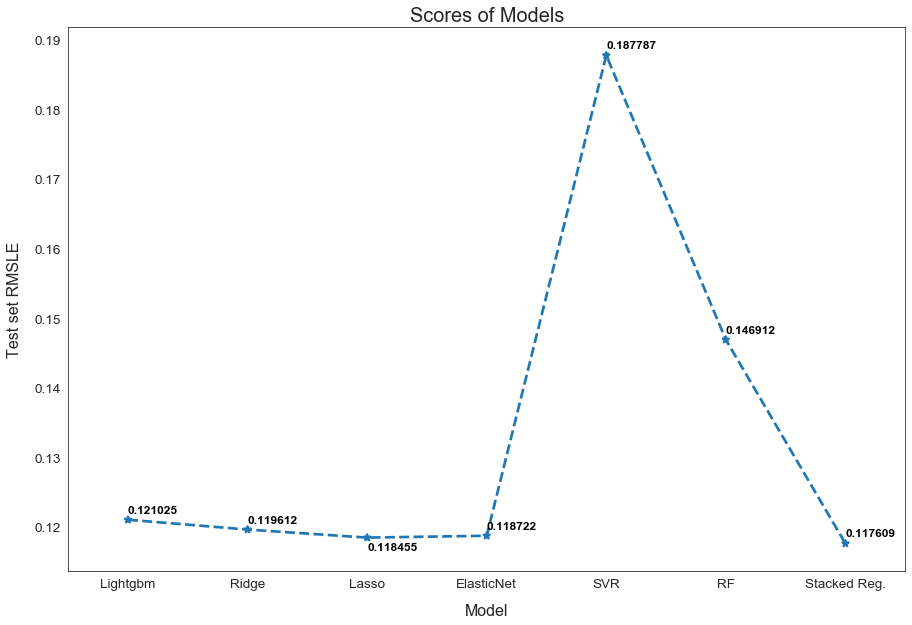

In [99]:
# Plot the predictions for each model

sns.set_style('white')

fig = plt.figure(figsize = (15 , 10))

ax = sns.pointplot(x = list(test_set_model_scores.keys()) , 
                   y = [score for score in list(test_set_model_scores.values())] , markers = '*' , linestyles = '--')

for index, score in enumerate(test_set_model_scores.values()):
    
    if index == 2:
        
        ax.text(index , score - 0.0018 , '{:.6f}'.format(score), 
            horizontalalignment = 'left', size = 'large', color = 'black', weight = 'semibold')
    
    else:
        
        ax.text(index , score + 0.001 , '{:.6f}'.format(score), 
            horizontalalignment = 'left', size = 'large', color = 'black', weight = 'semibold')

    
plt.ylabel('Test set RMSLE', size = 16 , labelpad = 12.5)
plt.xlabel('Model', size = 16 , labelpad = 12.5)
plt.tick_params(axis = 'x', labelsize = 13.5)
plt.tick_params(axis = 'y', labelsize = 13.5)

plt.title('Scores of Models', size = 20)

plt.show()

#### Blend models in order to make the final predictions more robust to overfitting. Achieved the best public score using the weights combination below. 

In [100]:
# Blend models in order to make the final predictions more robust to overfitting
# Achieved best public score using this weights combination for predictions

def blended_predictions(X , X_scaled):
    
    return (
        
        (0.25 * elasticNet.predict(X_scaled))   + 
        
        (0.10 * rf.predict(X)) +
        
        (0.10 * lightgbm.predict(X)) +
        
        (0.55 * stacked_reg.predict(X)) 
            
        )

In [101]:
print(f'RMSLE score on validation set: {rmsle(y_test , blended_predictions(X_test , X_test_scaled))}')

RMSLE score on validation set: 0.1177455453483722


#### Finally, we train our models on the **full training set** and make our predictions

In [102]:
models_to_fit = [elasticNet,lasso,lightgbm,svr,ridge,rf,stacked_reg]

In [103]:
# Using the scaled train data to fit the elasticNet and Lasso models

for model in models_to_fit:
    
    if model in (lightgbm,rf,svr,stacked_reg):
        
        model.fit(train_data , log_ytrain)
        
    else:
        
        model.fit(train_scaled , log_ytrain)

In [104]:
preds = blended_predictions(test_data , test_data_scaled)

Remeber, our predictions are the <b>log prices</b> so we have to exponentiate at the end to get results for the <code>SalePrice</code> target variable. Also, the RMSLE metric penalizes underestimation more than overestimation so we will multiply our final predictions by a factor of 1.005 to get a slightly improved public score.

In [105]:
submission_prices = np.expm1(preds) * 1.005

In [106]:
# Submitting the predictions in a CSV
submission = pd.DataFrame()
submission['Id'] = test.index
submission['SalePrice'] = submission_prices
submission.to_csv('blended_model.csv' , index = False)